<a href="https://colab.research.google.com/github/sakshisinha-13/Financial-Portfolio-Analysis/blob/main/Financial_Portfolio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import os
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
from pandas.testing import assert_frame_equal  # Use pandas.testing instead

import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from pylab import rcParams
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [114]:
!pip install yfinance
!pip install yahoofinancials

In [115]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf
GOOG = yf.download("GOOG", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Google
AAPL = yf.download("AAPL", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Apple
META = yf.download("META", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Facebook
AMZN = yf.download("AMZN", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Amazon
MSFT = yf.download("MSFT", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Microsoft
GSPC = yf.download("^GSPC", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of S&P 500
print(GOOG.shape, AAPL.shape, META.shape, AMZN.shape,MSFT.shape,GSPC.shape)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(2673, 6) (2673, 6) (2673, 6) (2673, 6) (2673, 6) (2673, 6)


In [116]:
GOOG

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  15.569143  15.751460  14.861794  14.953949  14.936952  239835606
2012-05-21  14.956689  15.334772  14.943986  15.295419  15.278033  123477094
2012-05-22  15.278732  15.287947  14.844360  14.963912  14.946903  122533571
2012-05-23  14.985082  15.183090  14.872255  15.179603  15.162349  127600492
2012-05-24  15.172131  15.240873  14.915842  15.035145  15.018055   75935562
...               ...        ...        ...        ...        ...        ...
2022-12-23  87.620003  90.099998  87.620003  89.809998  89.707916   17815000
2022-12-27  89.309998  89.500000  87.535004  87.930000  87.830055   15470900
2022-12-28  87.500000  88.519997  86.370003  86.459999  86.361725   17879600
2022-12-29  87.029999  89.364998  86.989998  88.949997  88.848892   18280700
2022-12-30  87.364998  88.830002  87.029999  88.730003  88.629150   19190300

[2673 rows x 6 columns]

In [117]:
AAPL

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   19.070000   19.407499   18.649286   18.942142   15.996174   
2012-05-21   19.089287   20.055000   19.073214   20.045713   16.928112   
2012-05-22   20.341070   20.495714   19.735001   19.891787   16.798120   
2012-05-23   19.910713   20.457144   19.758215   20.377144   17.207989   
2012-05-24   20.566786   20.589287   20.043928   20.190001   17.049961   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  130.631363   
2022-12-27  131.380005  131.410004  128.720001  130.029999  128.818405   
2022-12-28  129.669998  131.029999  125.870003  126.040001  124.865585   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.402328   
2022-12-30  128.410004  129.949997  127.430000  129.929993  128.719330   

               Volume  
Date                   
2012-05-18  732292400  
2012-05-21  631106000  
2012-05-22  694870400  
2012-05-23  584897600  
2012-05-24  496230000  
...               ...  
2022-12-23   63814900  
2022-12-27   69007800  
2022-12-28   85438400  
2022-12-29   75703700  
2022-12-30   77034200  

[2673 rows x 6 columns]

In [118]:
META

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.151604   
2012-05-21   36.529999   36.660000   33.000000   34.029999   33.960213   
2012-05-22   32.610001   33.590000   30.940001   31.000000   30.936428   
2012-05-23   31.370001   32.500000   31.360001   32.000000   31.934378   
2012-05-24   32.950001   33.209999   31.770000   33.029999   32.962265   
...                ...         ...         ...         ...         ...   
2022-12-23  116.029999  118.180000  115.540001  118.040001  117.797935   
2022-12-27  117.930000  118.599998  116.050003  116.879997  116.640312   
2022-12-28  116.250000  118.150002  115.510002  115.620003  115.382896   
2022-12-29  116.400002  121.029999  115.769997  120.260002  120.013382   
2022-12-30  118.160004  120.419998  117.739998  120.339996  120.093216   

               Volume  
Date                   
2012-05-18  573576400  
2012-05-21  168192700  
2012-05-22  101786600  
2012-05-23   73600000  
2012-05-24   50237200  
...               ...  
2022-12-23   17796600  
2022-12-27   21392300  
2022-12-28   19612500  
2022-12-29   22366200  
2022-12-30   19583800  

[2673 rows x 6 columns]

In [119]:
AMZN

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  10.970500  10.981500  10.640500  10.692500  10.692500  104634000
2012-05-21  10.701500  10.999000  10.641000  10.905500  10.905500   71596000
2012-05-22  10.915500  10.943500  10.698000  10.766500  10.766500   74662000
2012-05-23  10.735500  10.877500  10.559000  10.864000  10.864000   84876000
2012-05-24  10.849000  10.883000  10.635000  10.762000  10.762000   62822000
...               ...        ...        ...        ...        ...        ...
2022-12-23  83.250000  85.779999  82.930000  85.250000  85.250000   57433700
2022-12-27  84.970001  85.349998  83.000000  83.040001  83.040001   57284000
2022-12-28  82.800003  83.480003  81.690002  81.820000  81.820000   58228600
2022-12-29  82.870003  84.550003  82.550003  84.180000  84.180000   54995900
2022-12-30  83.120003  84.050003  82.470001  84.000000  84.000000   62401200

[2673 rows x 6 columns]

In [120]:
MSFT

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   29.790001   29.809999   29.170000   29.270000   23.443848   
2012-05-21   29.100000   29.790001   29.059999   29.750000   23.828300   
2012-05-22   29.690001   29.879999   29.500000   29.760000   23.836306   
2012-05-23   29.350000   29.400000   28.639999   29.110001   23.315693   
2012-05-24   29.160000   29.299999   28.760000   29.070000   23.283651   
...                ...         ...         ...         ...         ...   
2022-12-23  236.110001  238.869995  233.940002  238.729996  235.345566   
2022-12-27  238.699997  238.929993  235.830002  236.960007  233.600677   
2022-12-28  236.889999  239.720001  234.169998  234.529999  231.205109   
2022-12-29  235.649994  241.919998  235.649994  241.009995  237.593216   
2022-12-30  238.210007  239.960007  236.660004  239.820007  236.420105   

              Volume  
Date                  
2012-05-18  56205300  
2012-05-21  38787900  
2012-05-22  39504900  
2012-05-23  65171000  
2012-05-24  52575000  
...              ...  
2022-12-23  21207000  
2022-12-27  16688600  
2022-12-28  17457100  
2022-12-29  19770700  
2022-12-30  21938500  

[2673 rows x 6 columns]

In [121]:
GSPC

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18  1305.050049  1312.239990  1291.979980  1295.219971  1295.219971   
2012-05-21  1295.729980  1316.390015  1295.729980  1315.989990  1315.989990   
2012-05-22  1316.089966  1328.489990  1310.040039  1316.630005  1316.630005   
2012-05-23  1316.020020  1320.709961  1296.530029  1318.859985  1318.859985   
2012-05-24  1318.719971  1324.140015  1310.500000  1320.680054  1320.680054   
...                 ...          ...          ...          ...          ...   
2022-12-23  3815.110107  3845.800049  3797.010010  3844.820068  3844.820068   
2022-12-27  3843.340088  3846.649902  3813.219971  3829.250000  3829.250000   
2022-12-28  3829.560059  3848.320068  3780.780029  3783.219971  3783.219971   
2022-12-29  3805.449951  3858.189941  3805.449951  3849.280029  3849.280029   
2022-12-30  3829.060059  3839.850098  3800.340088  3839.500000  3839.500000   

                Volume  
Date                    
2012-05-18  4512470000  
2012-05-21  3786750000  
2012-05-22  4123680000  
2012-05-23  4108330000  
2012-05-24  3937670000  
...                ...  
2022-12-23  2819280000  
2022-12-27  3030300000  
2022-12-28  3083520000  
2022-12-29  3003680000  
2022-12-30  2979870000  

[2673 rows x 6 columns]

In [122]:
GOOG.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [123]:
AAPL.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [124]:
META.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [125]:
AMZN.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [126]:
MSFT.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [127]:
GSPC.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [128]:
#Combining dataframes
dataset = pd.concat([GOOG.Close, AAPL.Close,META.Close,AMZN.Close, MSFT.Close,GSPC.Close],axis=1)
# Change the column names
dataset.columns =['GOOG', 'AAPL', 'META','AMZN','MSFT','GSPC']
dataset.head()

GOOG       AAPL       META     AMZN       MSFT         GSPC
Date                                                                        
2012-05-18  14.953949  18.942142  38.230000  10.6925  29.270000  1295.219971
2012-05-21  15.295419  20.045713  34.029999  10.9055  29.750000  1315.989990
2012-05-22  14.963912  19.891787  31.000000  10.7665  29.760000  1316.630005
2012-05-23  15.179603  20.377144  32.000000  10.8640  29.110001  1318.859985
2012-05-24  15.035145  20.190001  33.029999  10.7620  29.070000  1320.680054

In [129]:
print('Shape of data',dataset.shape)

Shape of data (2673, 6)


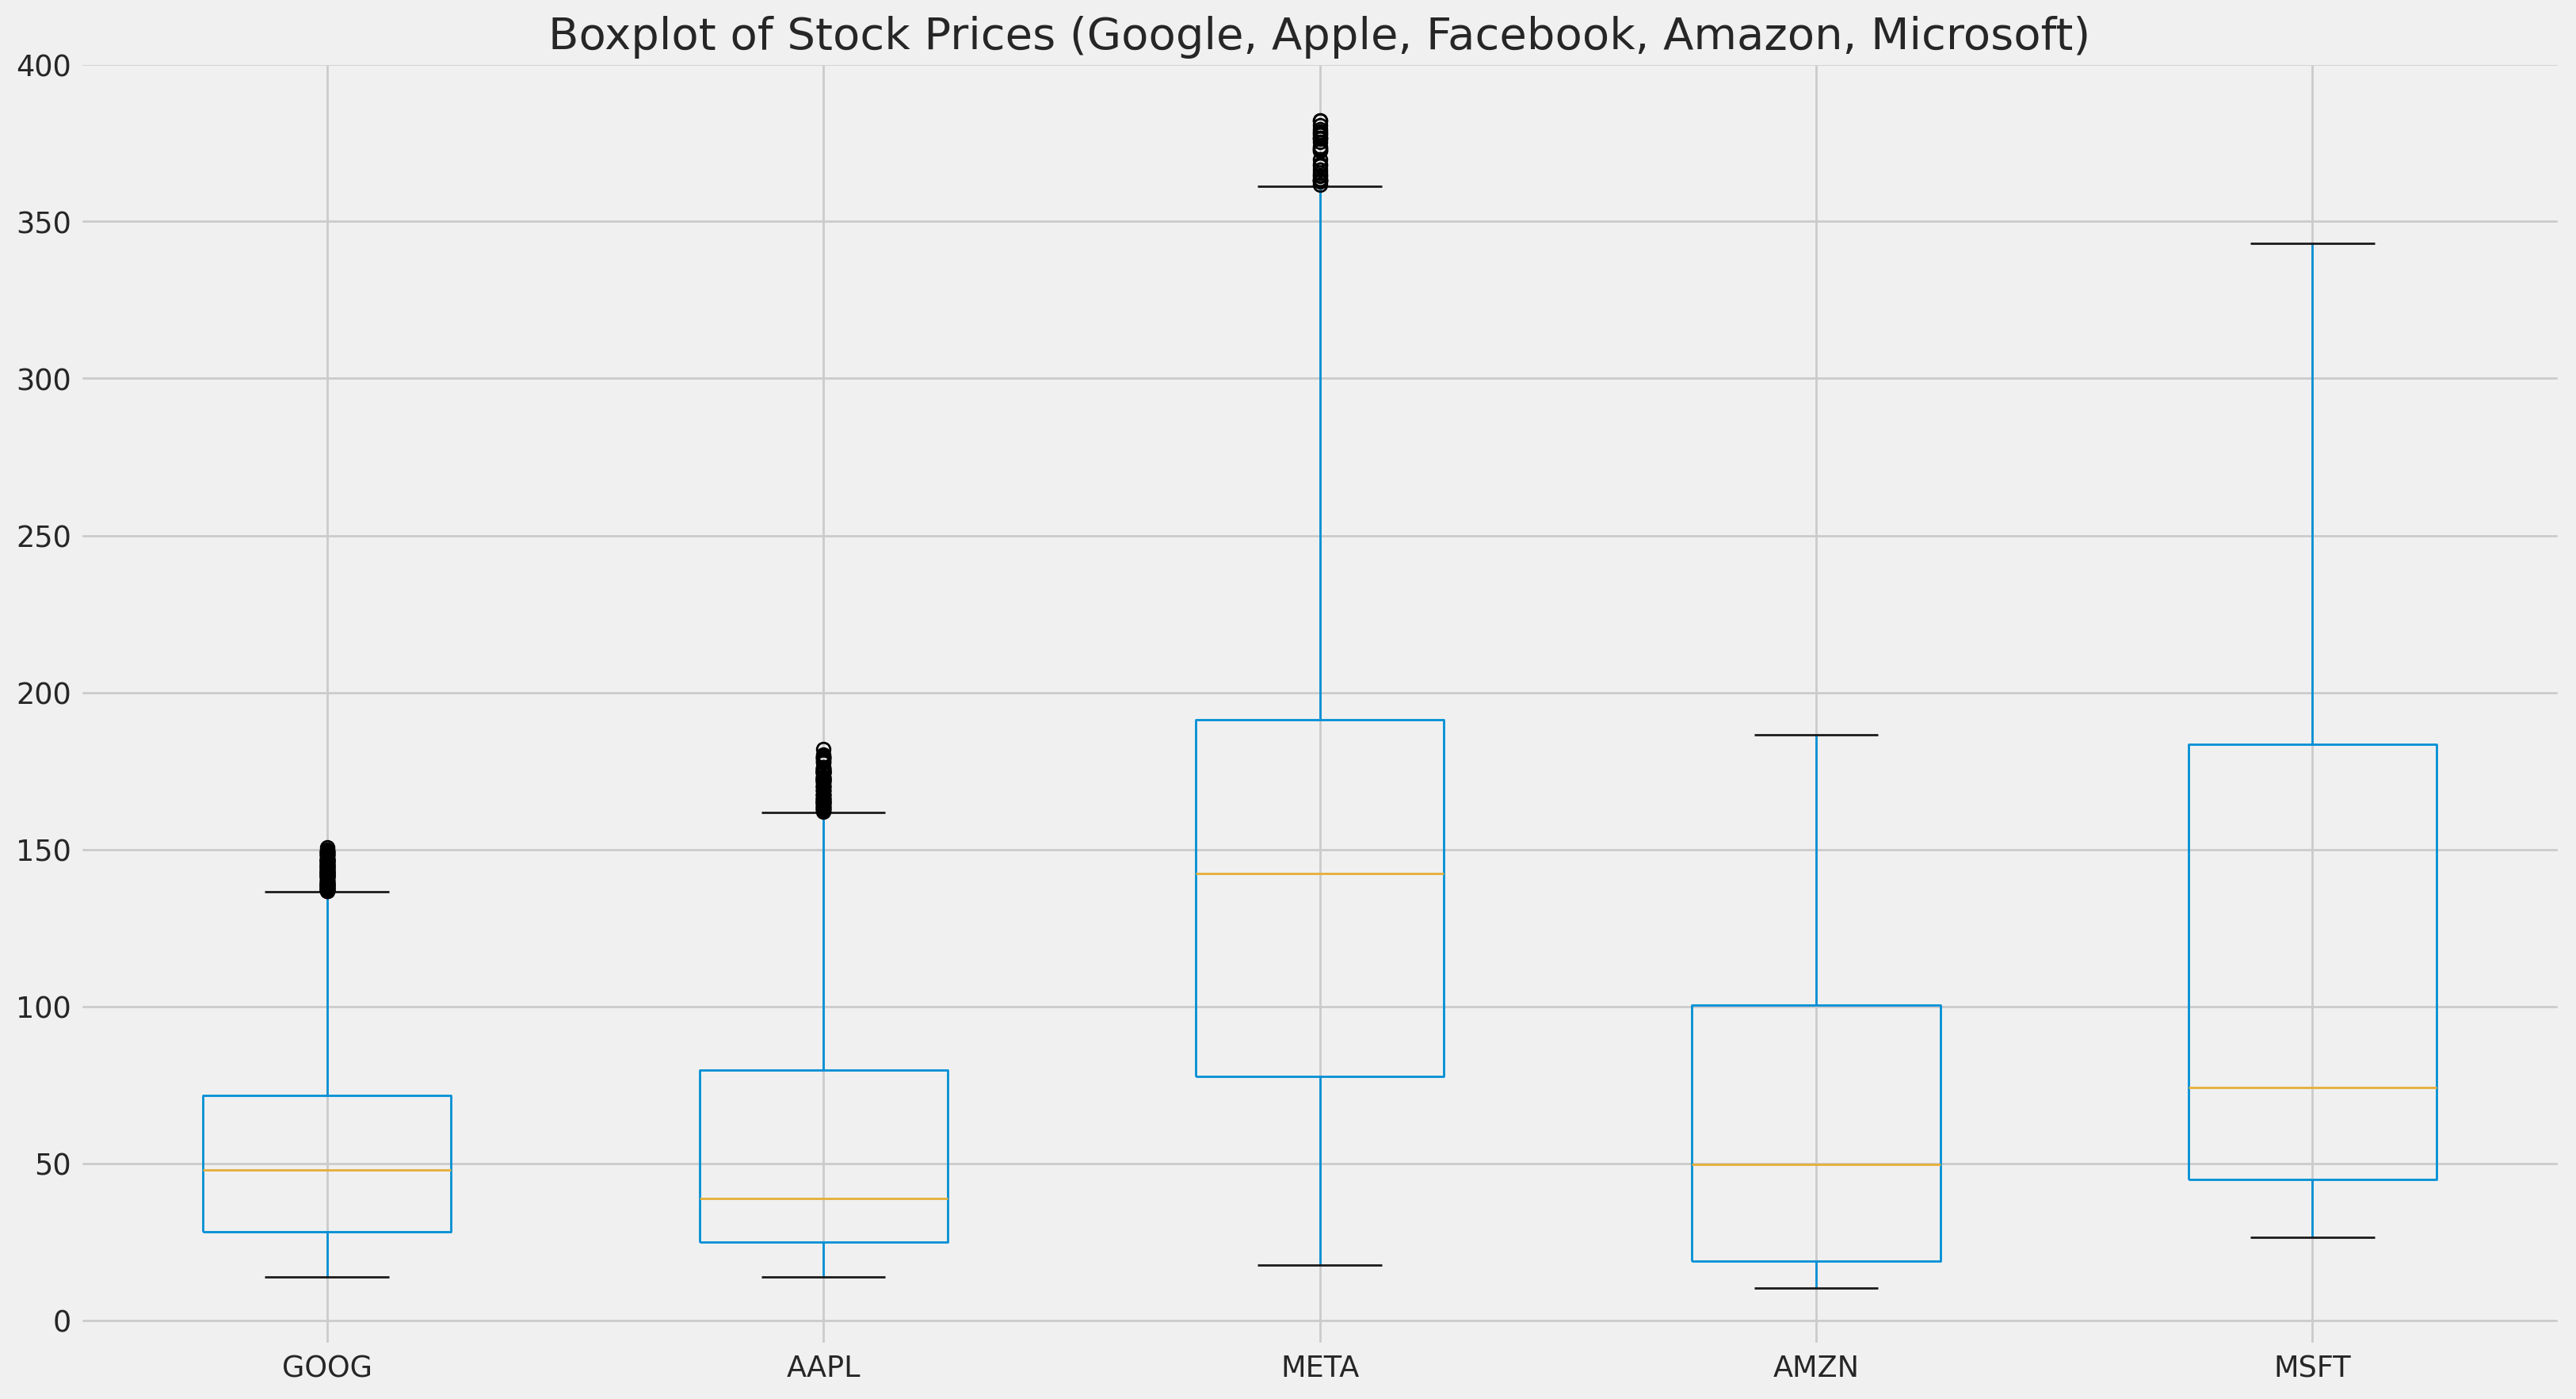

In [130]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN','MSFT']].boxplot()
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

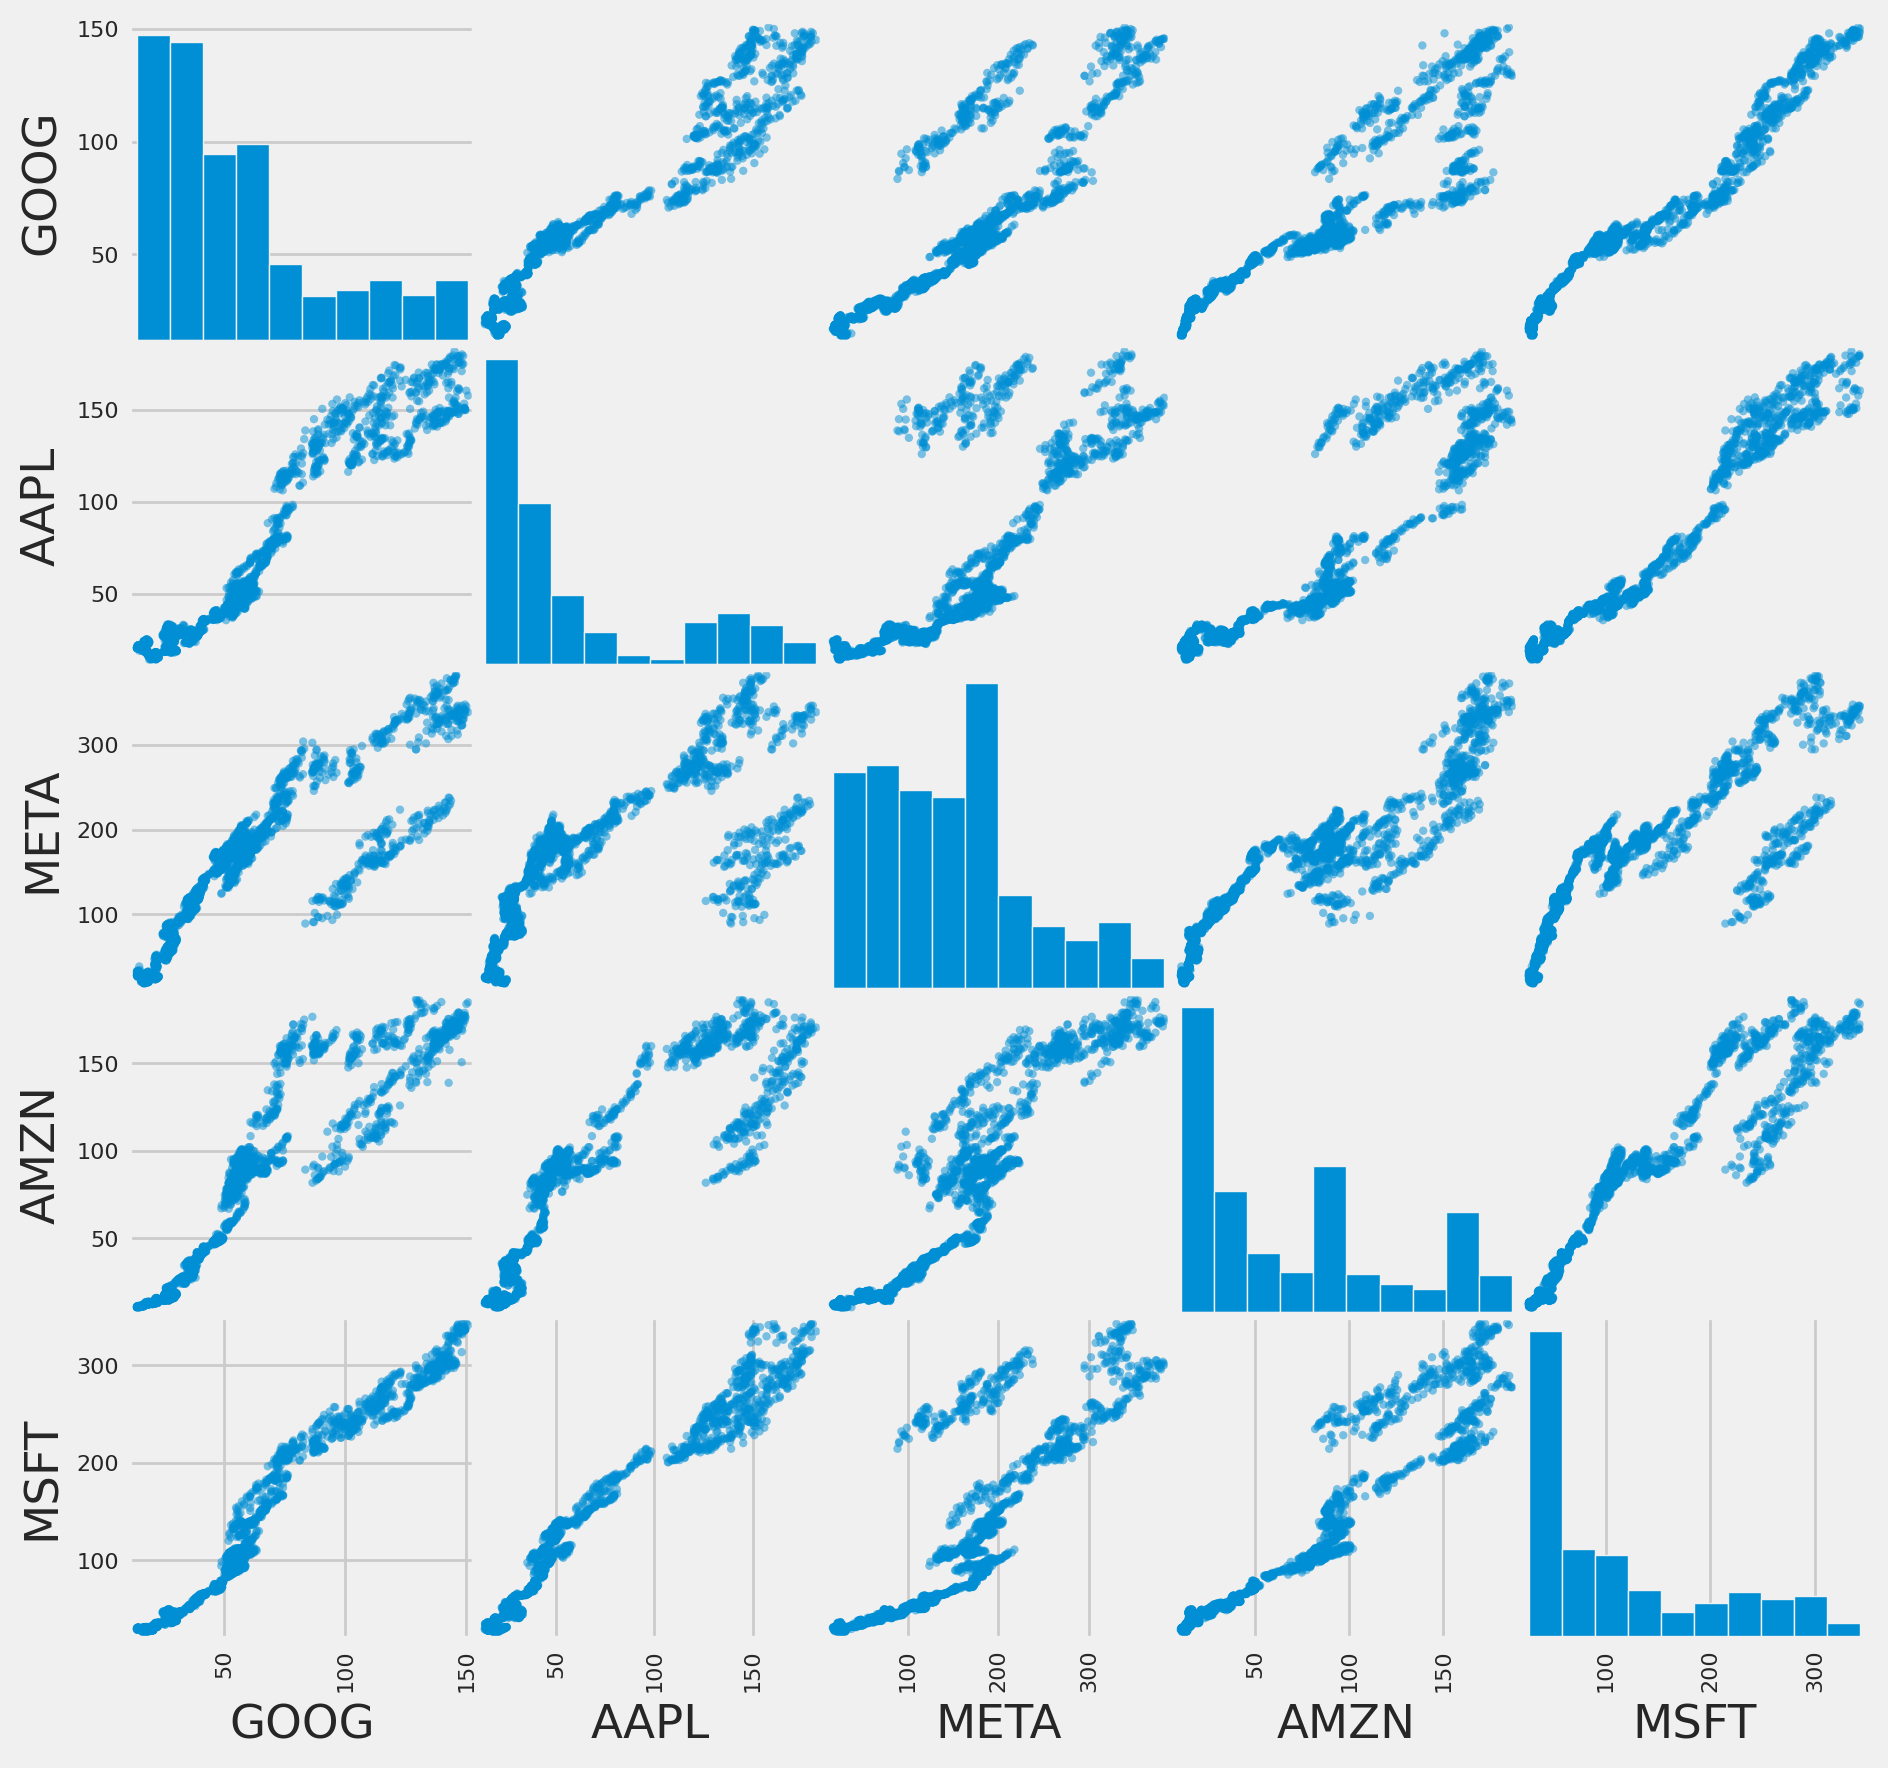

In [131]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN','MSFT']], figsize=(10,10))
plt.show()

## Visualization of the closing prices evolution of each company

In [132]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

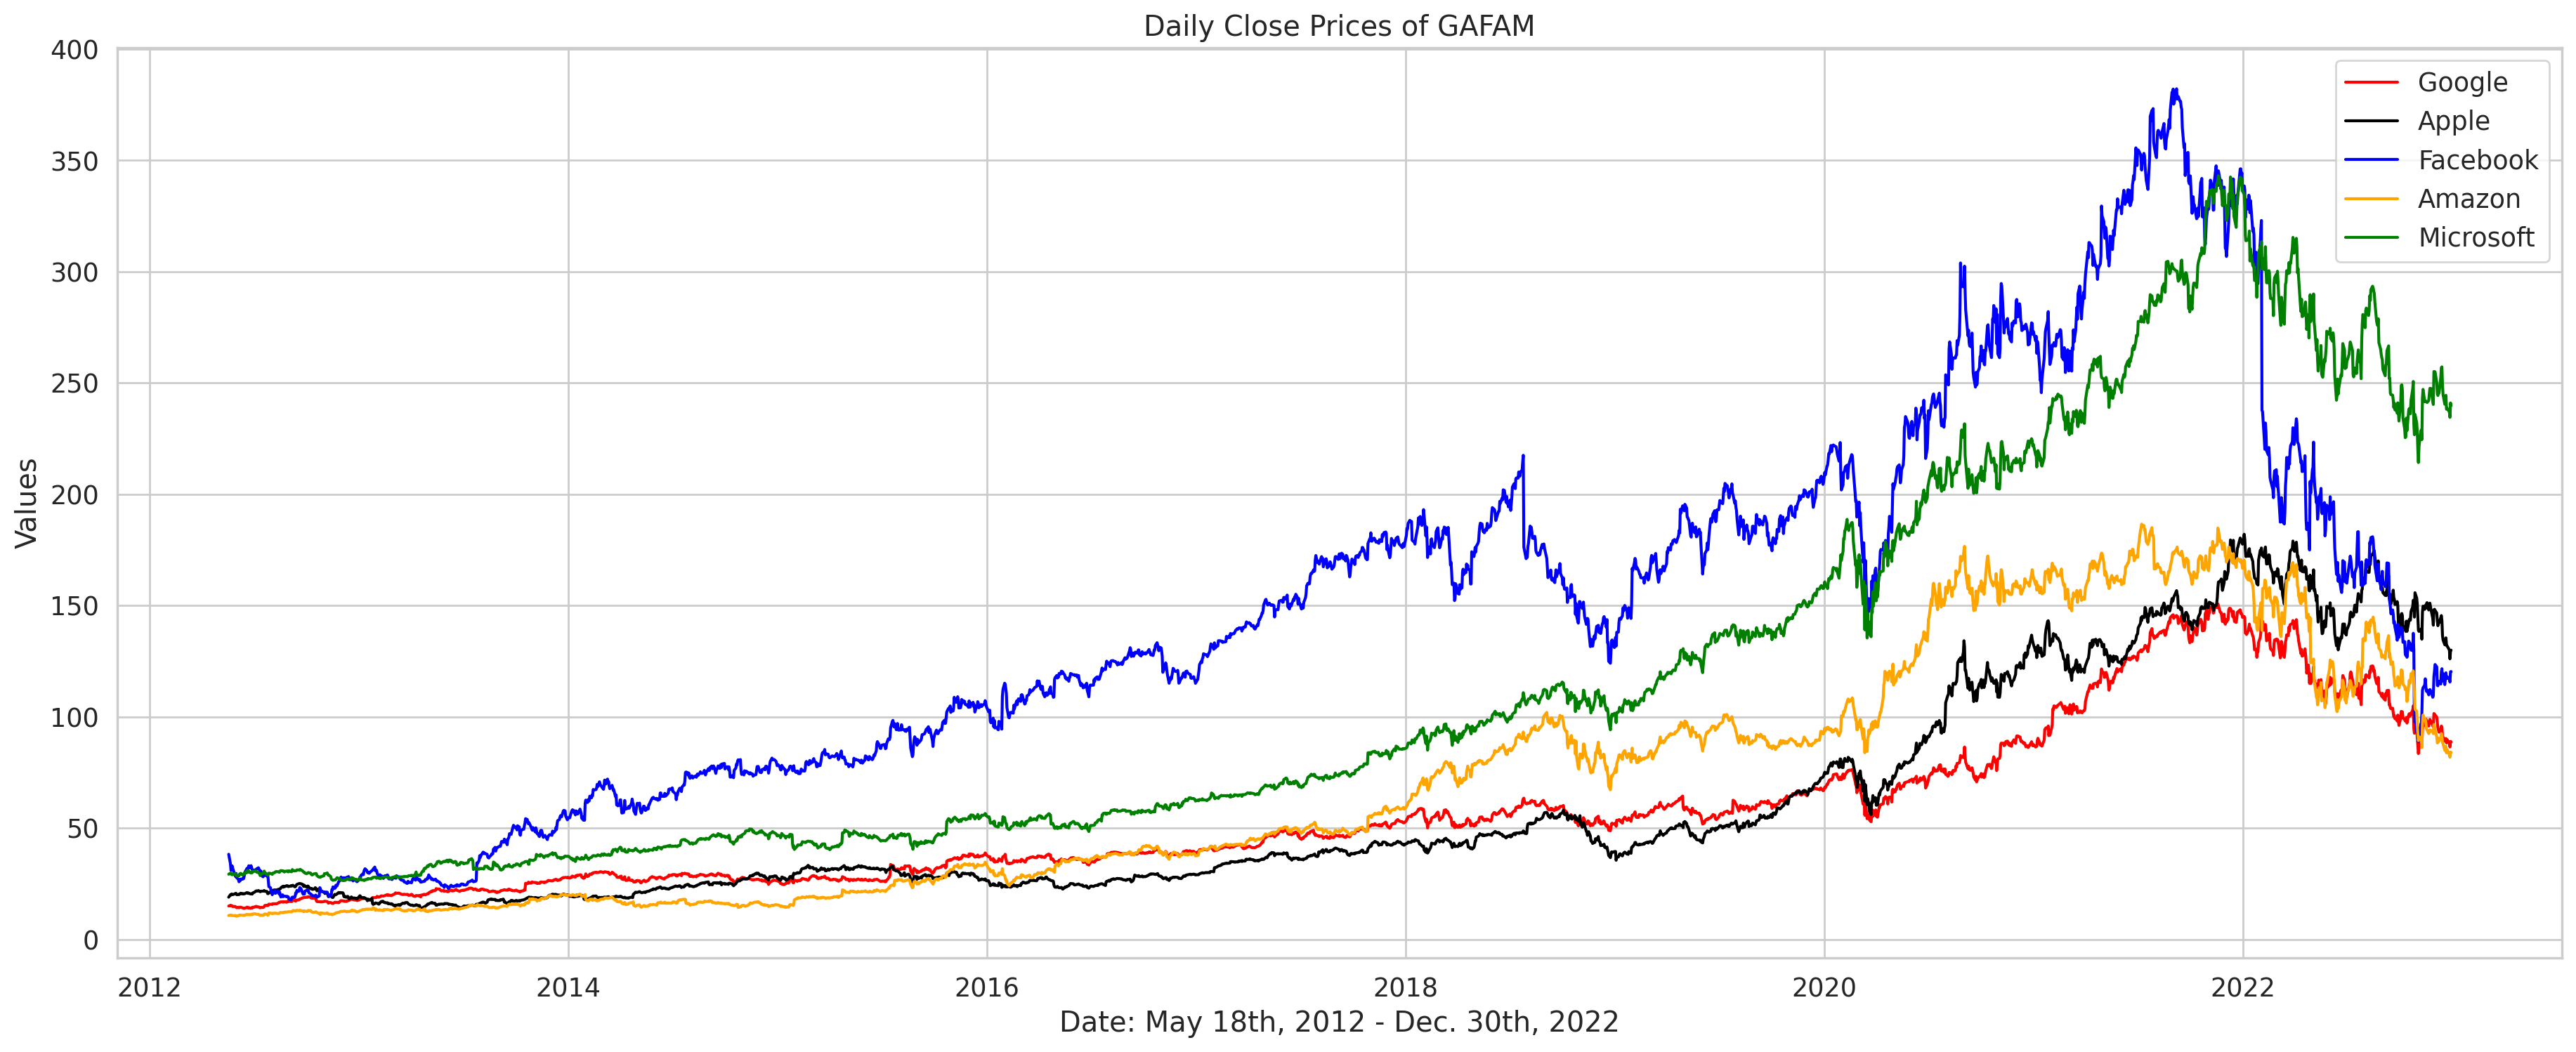

In [133]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

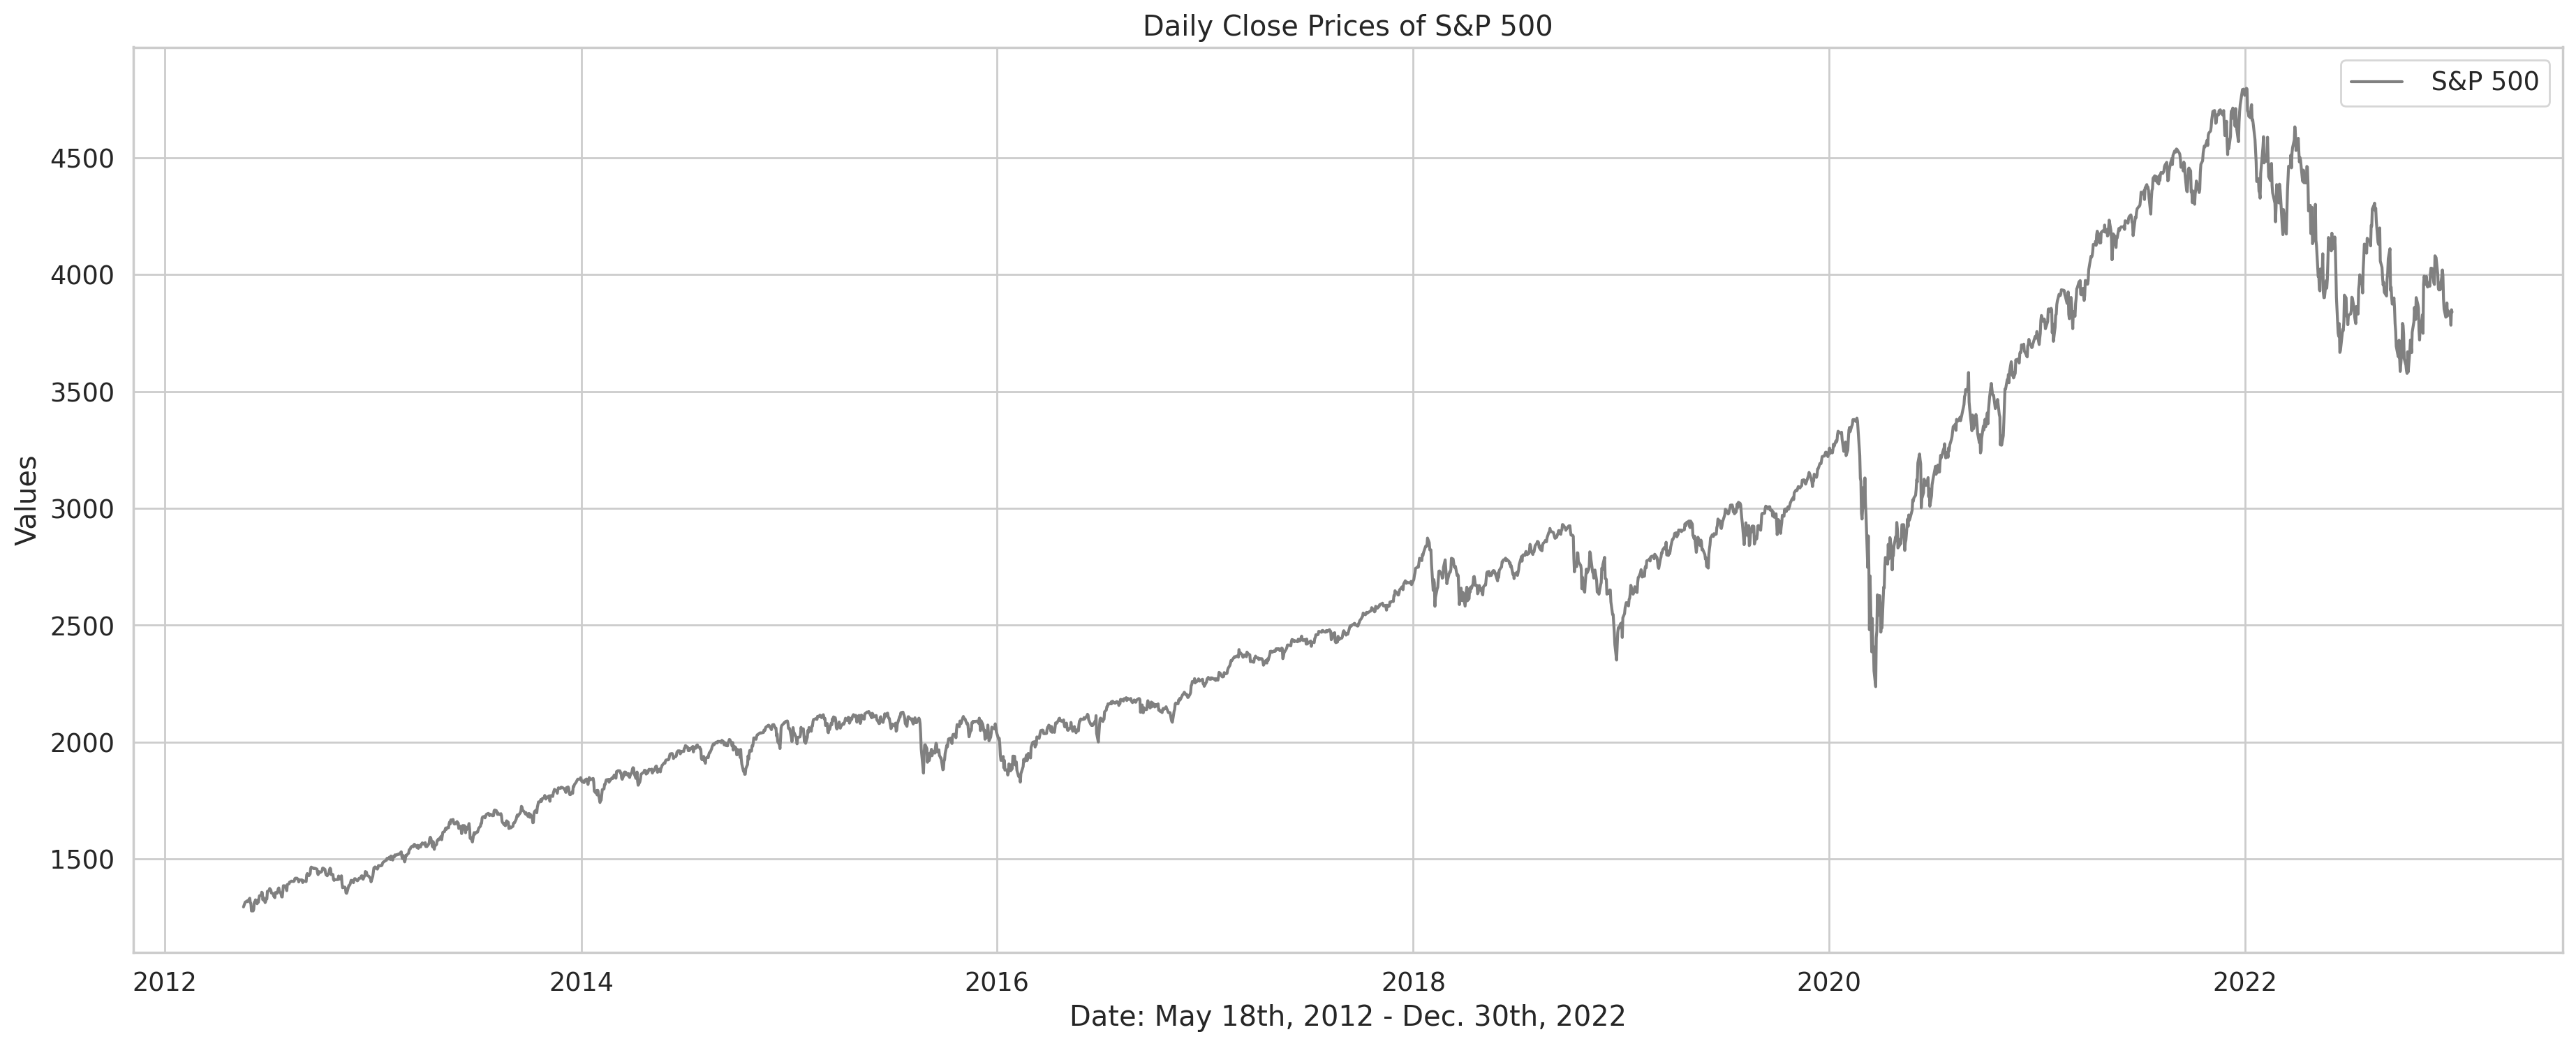

In [134]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

In [135]:
#Create a new columns Return in the dataset for each company's
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head

<bound method NDFrame.head of                  GOOG        AAPL        META       AMZN        MSFT  \
Date                                                                   
2012-05-18  14.953949   18.942142   38.230000  10.692500   29.270000   
2012-05-21  15.295419   20.045713   34.029999  10.905500   29.750000   
2012-05-22  14.963912   19.891787   31.000000  10.766500   29.760000   
2012-05-23  15.179603   20.377144   32.000000  10.864000   29.110001   
2012-05-24  15.035145   20.190001   33.029999  10.762000   29.070000   
...               ...         ...         ...        ...         ...   
2022-12-23  89.809998  131.860001  118.040001  85.250000  238.729996   
2022-12-27  87.930000  130.029999  116.879997  83.040001  236.960007   
2022-12-28  86.459999  126.040001  115.620003  81.820000  234.529999   
2022-12-29  88.949997  129.610001  120.260002  84.180000  241.009995   
2022-12-30  88.730003  129.929993  120.339996  84.000000  239.820007   

                   GSPC    R_GOOG    R_AAPL    R_META    R_AMZN    R_MSFT  \
Date                                                                        
2012-05-18  1295.219971       NaN       NaN       NaN       NaN       NaN   
2012-05-21  1315.989990  0.022835  0.058260 -0.109861  0.019921  0.016399   
2012-05-22  1316.630005 -0.021674 -0.007679 -0.089039 -0.012746  0.000336   
2012-05-23  1318.859985  0.014414  0.024400  0.032258  0.009056 -0.021841   
2012-05-24  1320.680054 -0.009517 -0.009184  0.032187 -0.009389 -0.001374   
...                 ...       ...       ...       ...       ...       ...   
2022-12-23  3844.820068  0.017562 -0.002798  0.007855  0.017425  0.002267   
2022-12-27  3829.250000 -0.020933 -0.013878 -0.009827 -0.025924 -0.007414   
2022-12-28  3783.219971 -0.016718 -0.030685 -0.010780 -0.014692 -0.010255   
2022-12-29  3849.280029  0.028799  0.028324  0.040131  0.028844  0.027630   
2022-12-30  3839.500000 -0.002473  0.002469  0.000665 -0.002138 -0.004938   

              R_GSPC  
Date                  
2012-05-18       NaN  
2012-05-21  0.016036  
2012-05-22  0.000486  
2012-05-23  0.001694  
2012-05-24  0.001380  
...              ...  
2022-12-23  0.005868  
2022-12-27 -0.004050  
2022-12-28 -0.012021  
2022-12-29  0.017461  
2022-12-30 -0.002541  

[2673 rows x 12 columns]>

In [136]:
dataset.describe()

GOOG         AAPL         META         AMZN         MSFT  \
count  2673.000000  2673.000000  2673.000000  2673.000000  2673.000000   
mean     56.827974    60.044056   147.991912    70.188333   116.448706   
std      35.578551    48.235577    86.999128    53.709630    89.866126   
min      13.924059    13.947500    17.730000    10.411000    26.370001   
25%      28.241163    24.965000    77.830002    18.938499    44.830002   
50%      47.955502    38.867500   142.279999    49.758499    74.190002   
75%      71.591003    79.722504   191.289993   100.495003   183.429993   
max     150.709000   182.009995   382.179993   186.570496   343.109985   

              GSPC       R_GOOG       R_AAPL       R_META       R_AMZN  \
count  2673.000000  2672.000000  2672.000000  2672.000000  2672.000000   
mean   2664.394164     0.000809     0.000889     0.000751     0.000978   
std     904.069600     0.016898     0.018314     0.025274     0.020336   
min    1278.040039    -0.111008    -0.128647    -0.263901    -0.140494   
25%    1989.569946    -0.006764    -0.007677    -0.010112    -0.008609   
50%    2473.449951     0.000688     0.000671     0.000870     0.000916   
75%    3197.520020     0.008903     0.010434     0.012629     0.011109   
max    4796.560059     0.160524     0.119808     0.296115     0.141311   

            R_MSFT       R_GSPC  
count  2672.000000  2672.000000  
mean      0.000930     0.000467  
std       0.016856     0.010953  
min      -0.147390    -0.119841  
25%      -0.006850    -0.003640  
50%       0.000681     0.000594  
75%       0.009257     0.005426  
max       0.142169     0.093828

In [137]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()

R_GOOG    0.016898
R_AAPL    0.018314
R_META    0.025274
R_AMZN    0.020336
R_MSFT    0.016856
R_GSPC    0.010953
dtype: float64

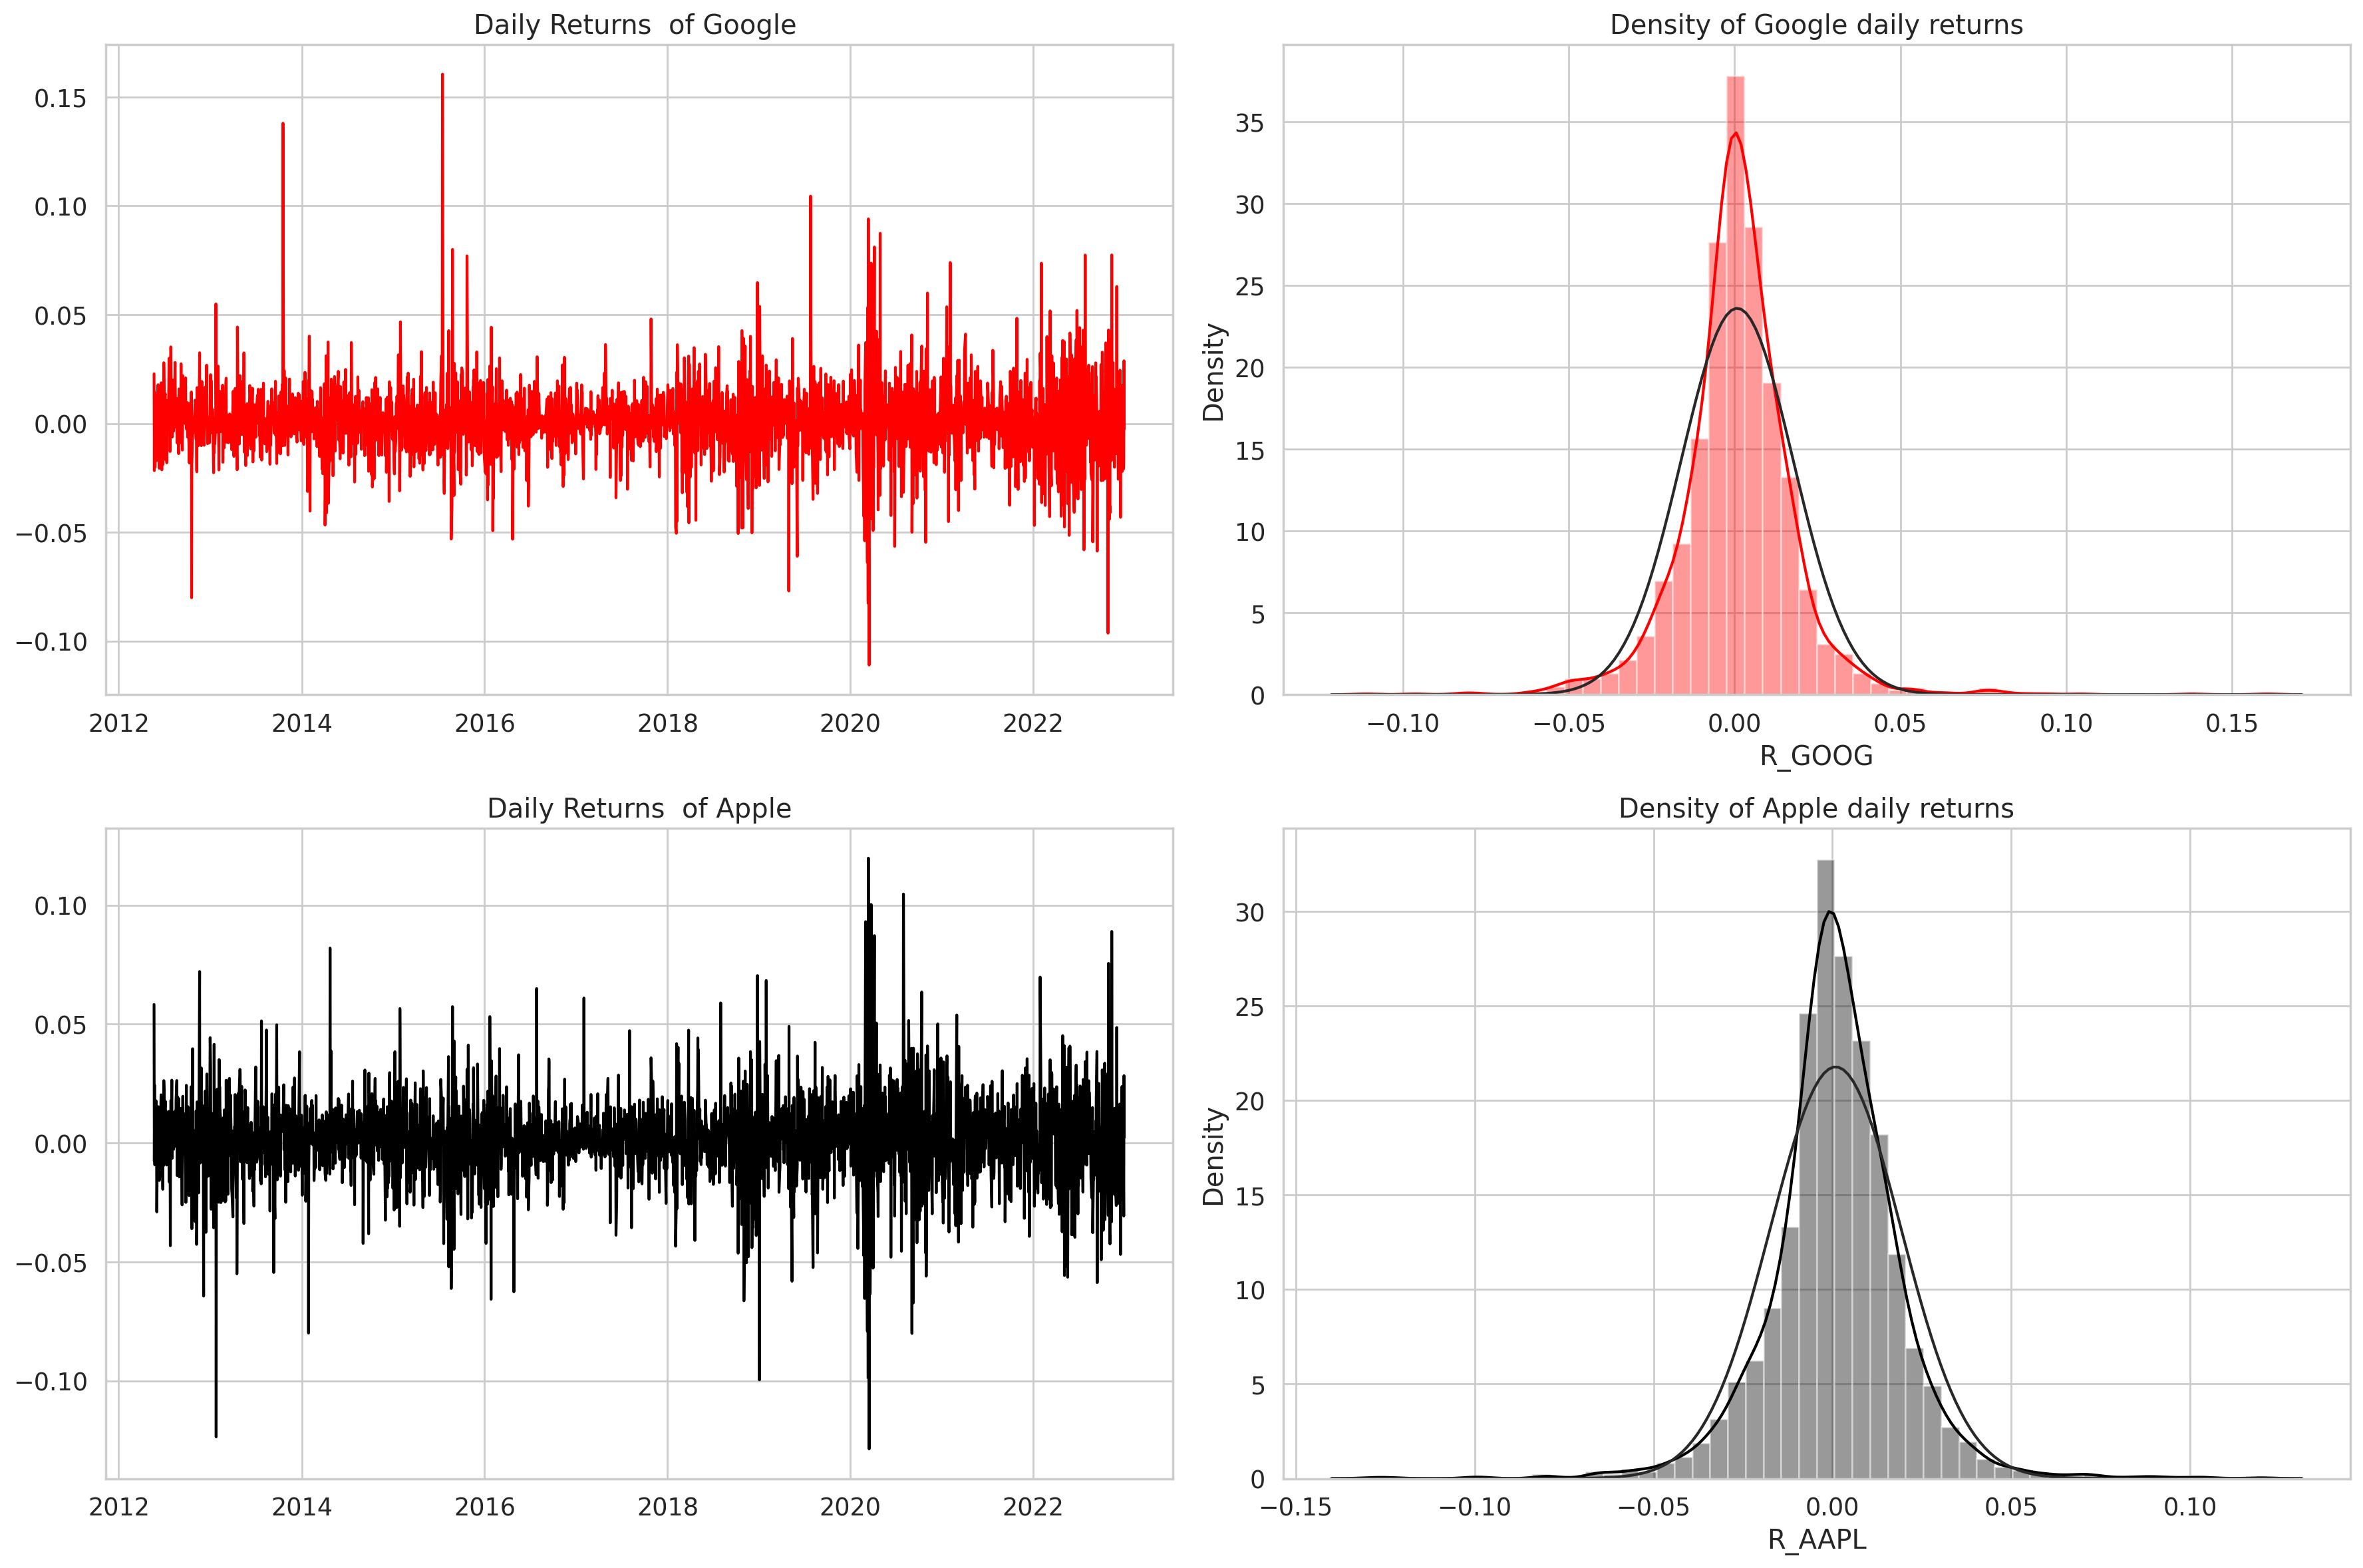

In [138]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Daily Returns  of Google ')

    sns.distplot(dataset['R_GOOG'], norm_hist=True, fit=stats.norm, color='red',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Google daily returns')

    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Daily Returns  of Apple')

    sns.distplot(dataset['R_AAPL'], norm_hist=True, fit=stats.norm, color='black',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Apple daily returns')
    plt.tight_layout()
    fig.show();

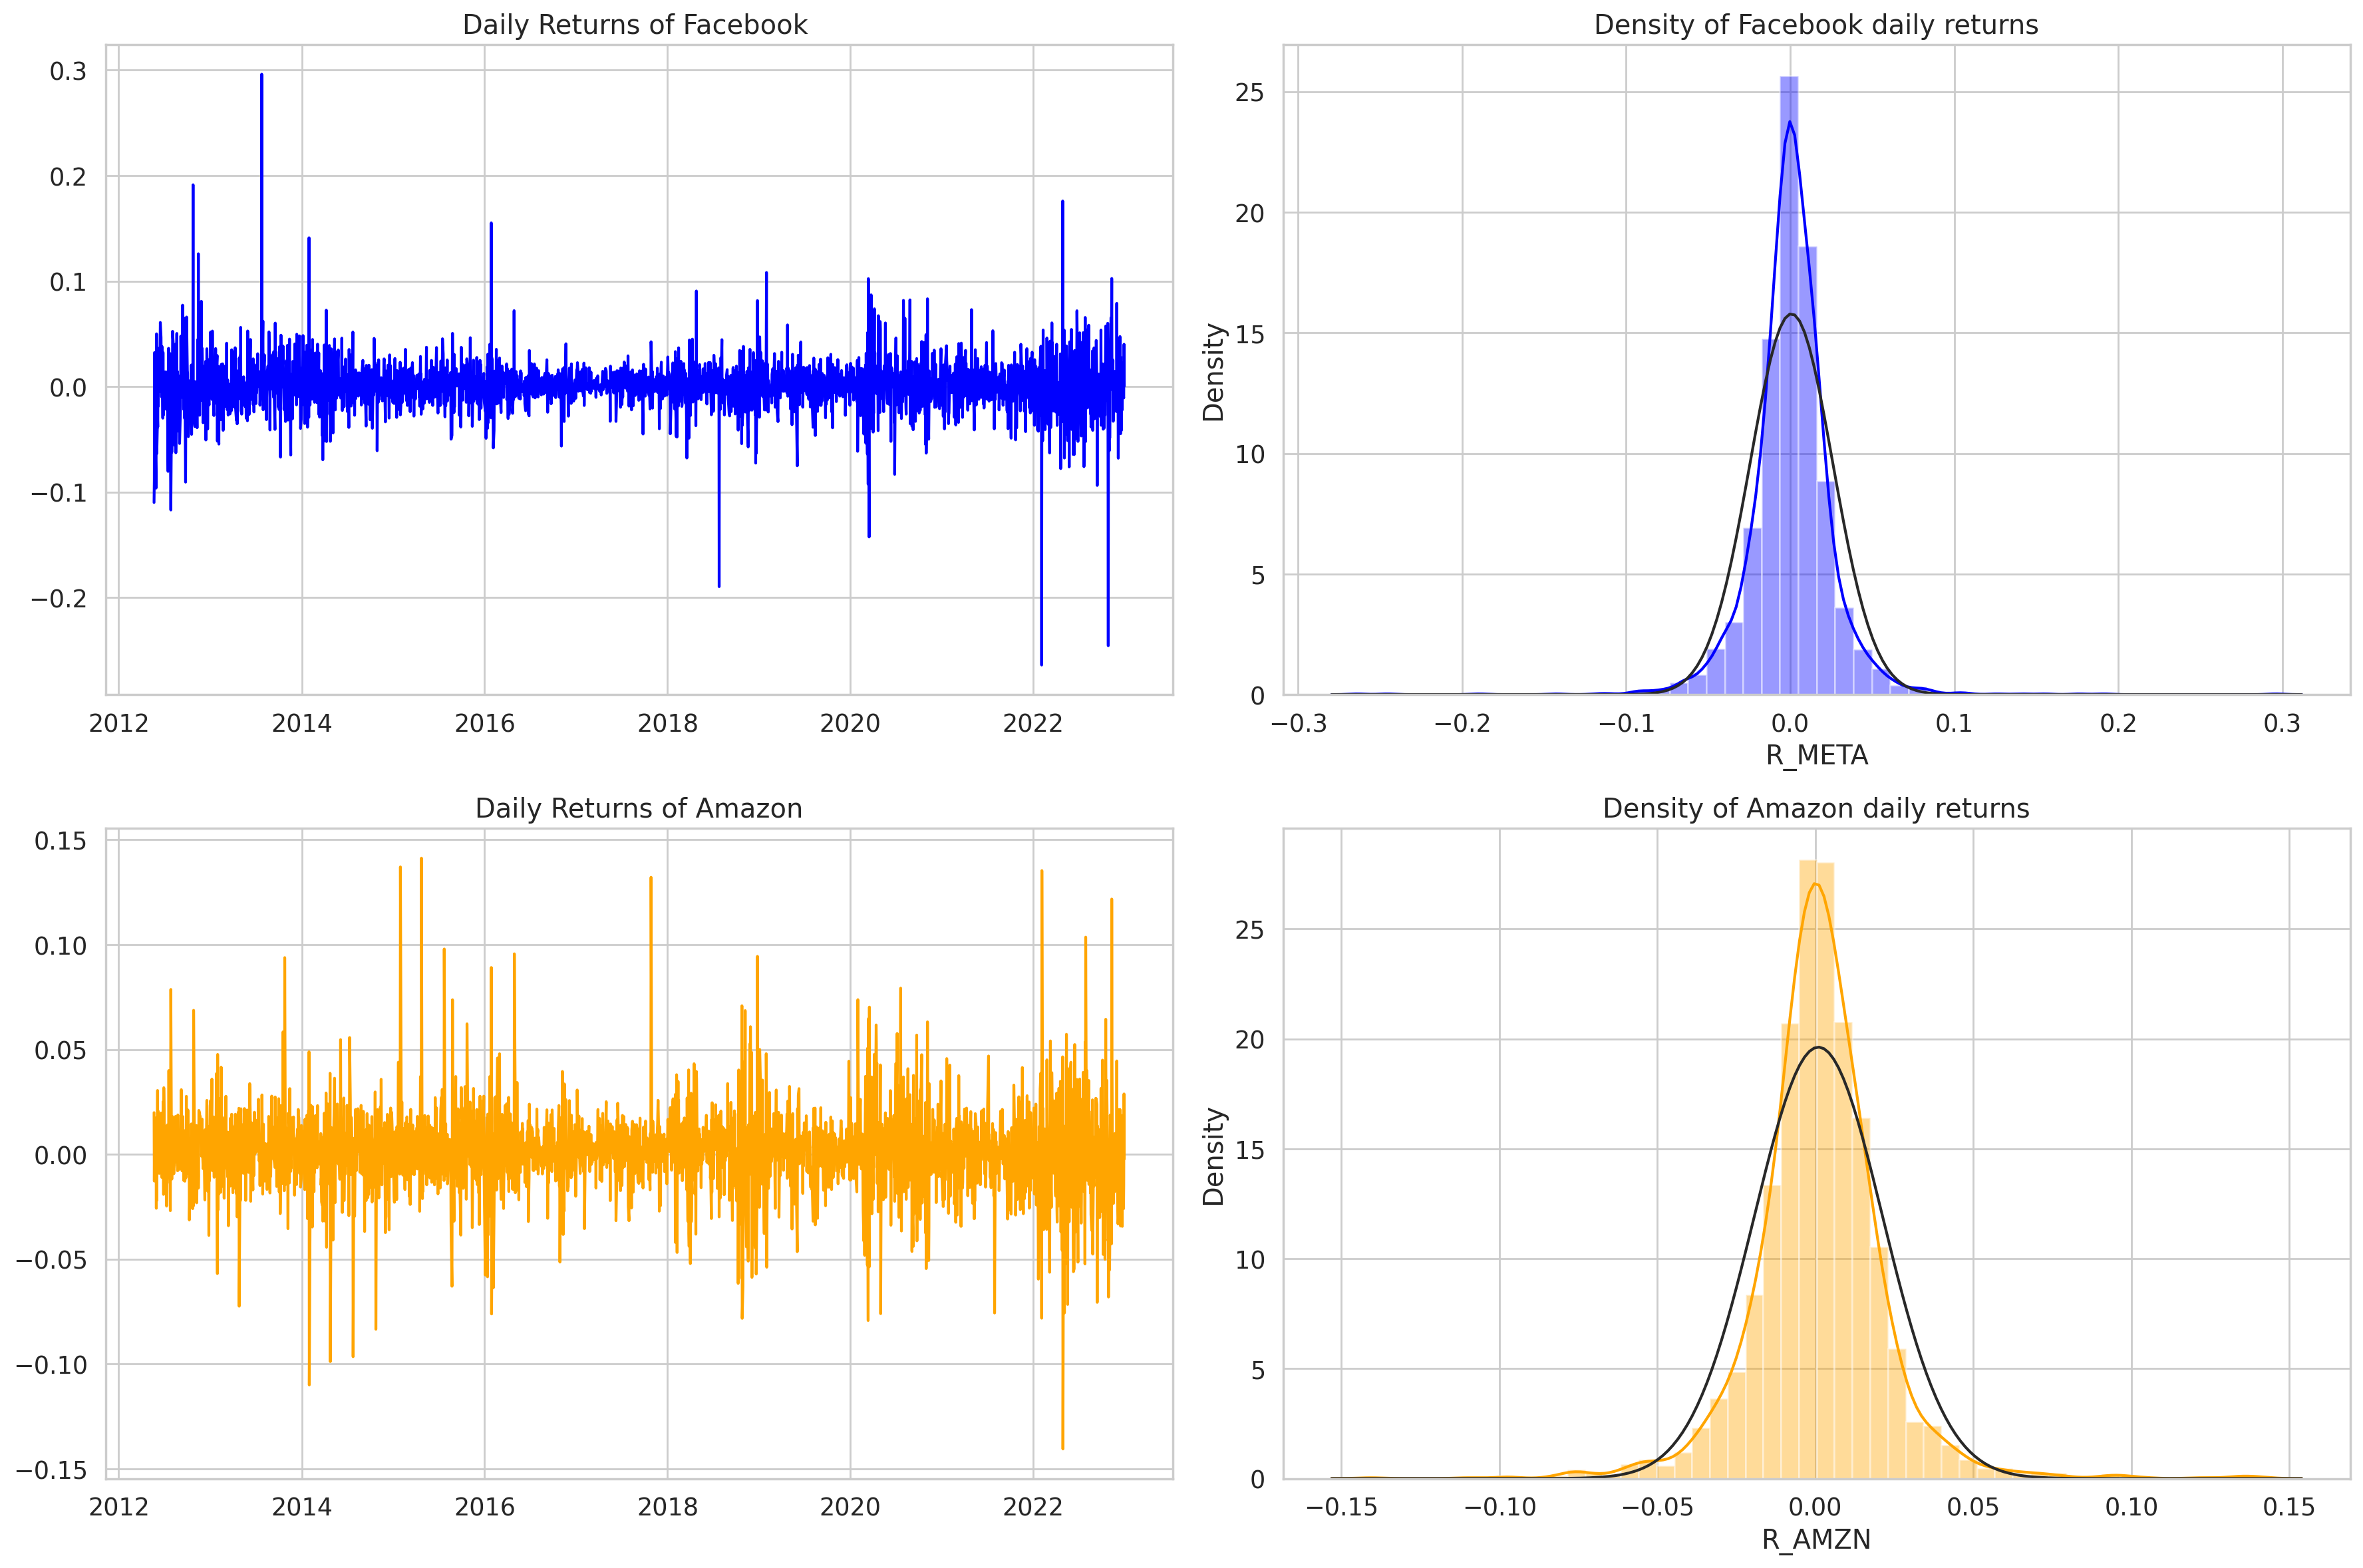

In [139]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_META'], color='blue')
    axes[0][0].set_title('Daily Returns of Facebook ')

    sns.distplot(dataset['R_META'], norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Facebook daily returns')

    axes[1][0].plot(dataset['R_AMZN'], color='orange')
    axes[1][0].set_title('Daily Returns of Amazon')

    sns.distplot(dataset['R_AMZN'], norm_hist=True, fit=stats.norm, color='orange',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Amazon daily returns')
    plt.tight_layout()
    fig.show();

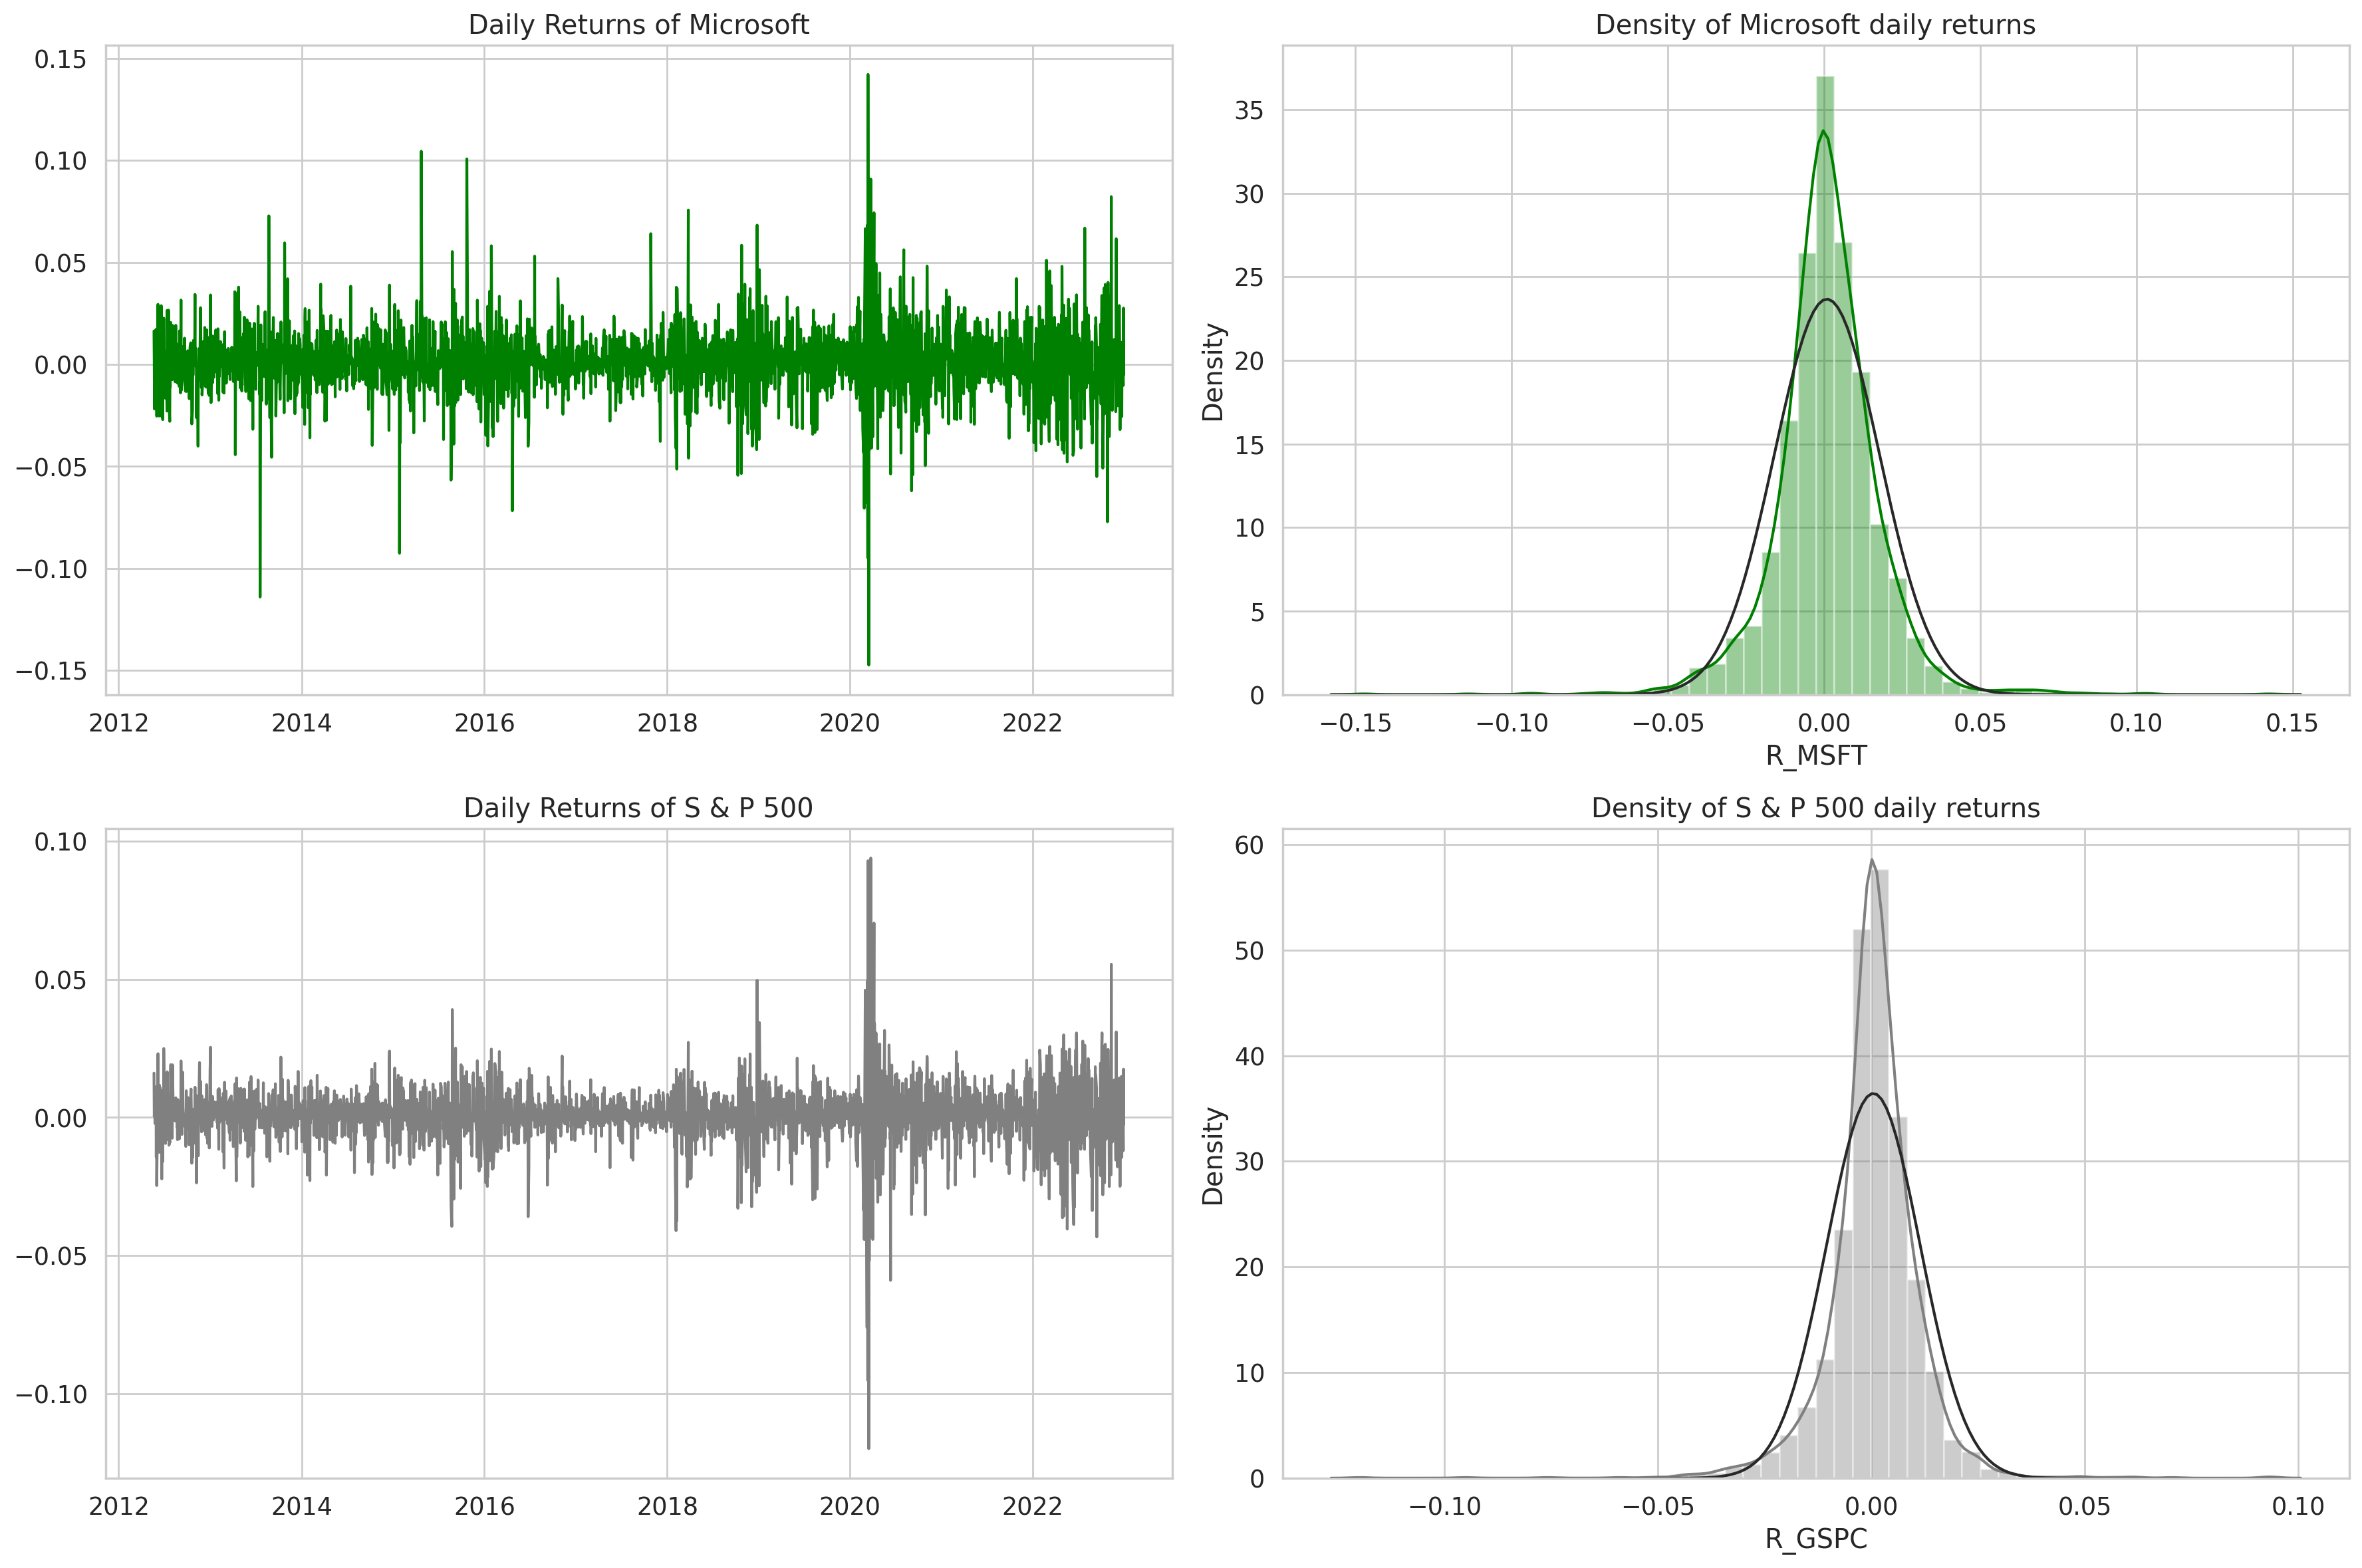

In [140]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_MSFT'], color='green')
    axes[0][0].set_title('Daily Returns of Microsoft')

    sns.distplot(dataset['R_MSFT'], norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Microsoft daily returns')

    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('Daily Returns of S & P 500')

    sns.distplot(dataset['R_GSPC'], norm_hist=True, fit=stats.norm, color='grey',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of S & P 500 daily returns')
    plt.tight_layout()
    fig.show();

# Portfolio Optimization using Efficient Frontier

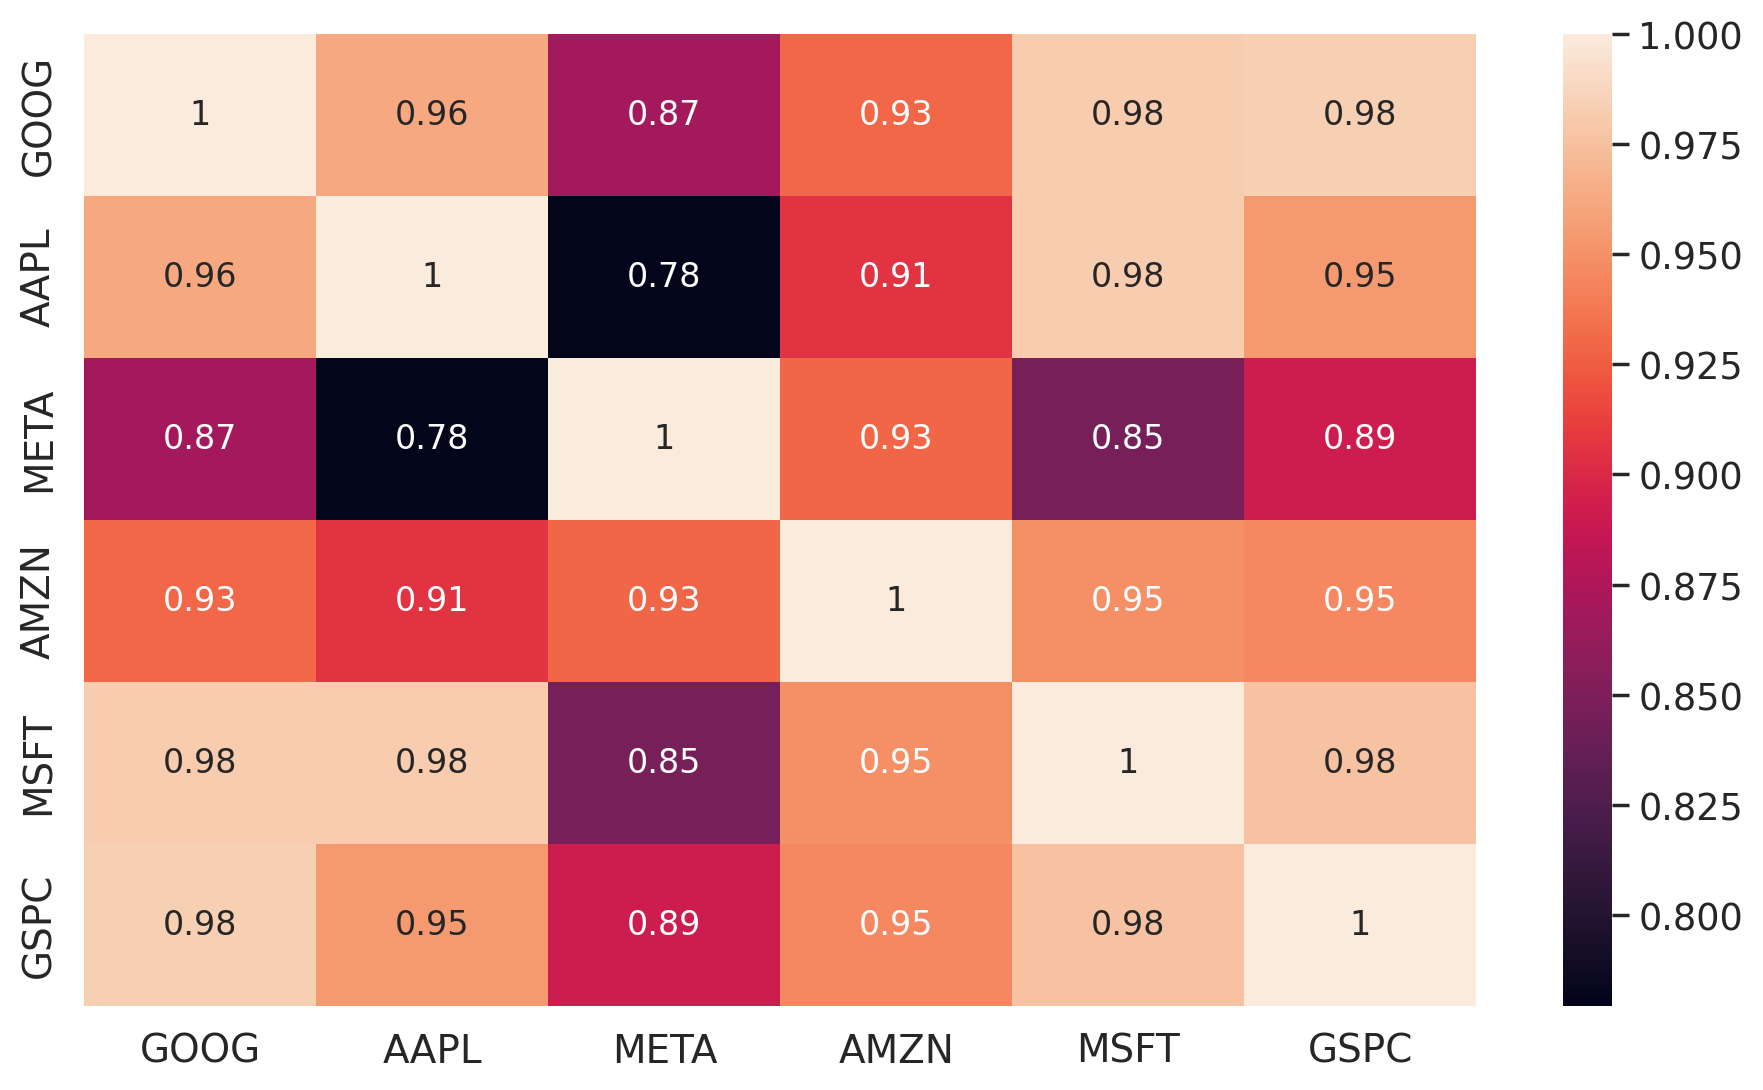

In [141]:
corr = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

### Correlation coefficients between companies' returns

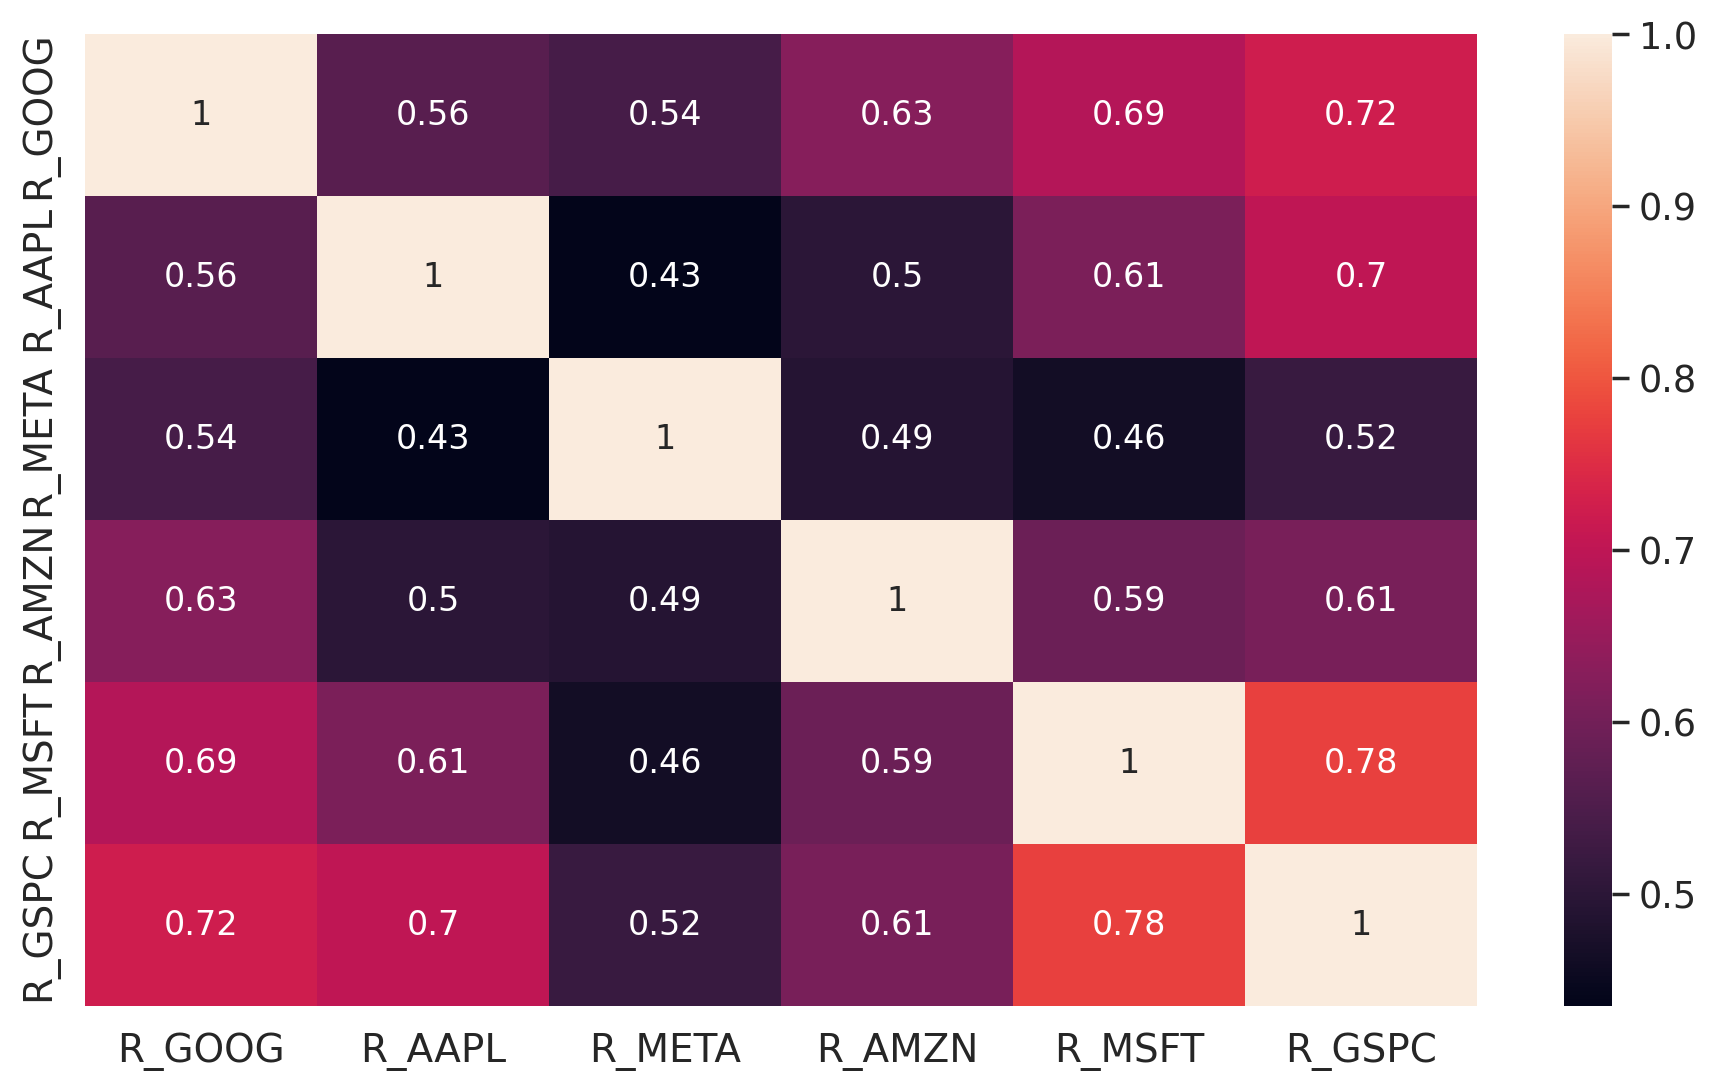

In [142]:
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [143]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 26.82 % per year
The volatility of the stock of R_AAPL = 29.07 % per year
The volatility of the stock of R_META = 40.12 % per year
The volatility of the stock of R_AMZN = 32.28 % per year
The volatility of the stock of R_MSFT = 26.76 % per year
The volatility of the stock of R_GSPC = 17.39 % per year


We can see that the annual volatility of Meta ($41.01\%$) is higher than the other stocks.

In [144]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 7.74 % per month
The volatility of the stock of R_AAPL = 8.39 % per month
The volatility of the stock of R_META = 11.58 % per month
The volatility of the stock of R_AMZN = 9.32 % per month
The volatility of the stock of R_MSFT = 7.72 % per month
The volatility of the stock of R_GSPC = 5.02 % per month


We can see that Meta's monthly volatility ($11.84\%$) is still higher than other stocks.

In [145]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [146]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.67
The Sharpe ratio of, R_AAPL = 0.68
The Sharpe ratio of, R_META = 0.41
The Sharpe ratio of, R_AMZN = 0.69
The Sharpe ratio of, R_MSFT = 0.78
The Sharpe ratio of, R_GSPC = 0.53


In [147]:
cov = returns.cov() * 12 # annualized
cov

R_GOOG    R_AAPL    R_META    R_AMZN    R_MSFT    R_GSPC
R_GOOG  0.003426  0.002098  0.002770  0.002577  0.002345  0.001607
R_AAPL  0.002098  0.004025  0.002415  0.002237  0.002270  0.001689
R_META  0.002770  0.002415  0.007665  0.003033  0.002361  0.001728
R_AMZN  0.002577  0.002237  0.003033  0.004962  0.002432  0.001623
R_MSFT  0.002345  0.002270  0.002361  0.002432  0.003410  0.001719
R_GSPC  0.001607  0.001689  0.001728  0.001623  0.001719  0.001440

In [148]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 1.1160956781111853


In [149]:
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')

Beta (10Y period) of Apple is : 1.1730606352218889


In [150]:
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Facebook is : {beta_META}')

Beta (10Y period) of Facebook is : 1.200017516496074


In [151]:
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')

Beta (10Y period) of Amazon is : 1.127099926299393


In [152]:
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')

Beta (10Y period) of Microsoft is : 1.1941011901897405


In [153]:
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of S&P 500 is : 1.0


In [154]:
from scipy.optimize import minimize

In [155]:
# Portfolio Simulation
portfolio        = 2673  # generation of a portfolio
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                          # risk free rate

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [156]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):

    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

In [157]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 is an initila guess

    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)

In [158]:
def min_vol():

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds      = bounds,
                   constraints = weight_constraints)

In [159]:
def efficient_portfolio_target(target):

    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds      = bounds,
                    constraints = constraints)

In [160]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

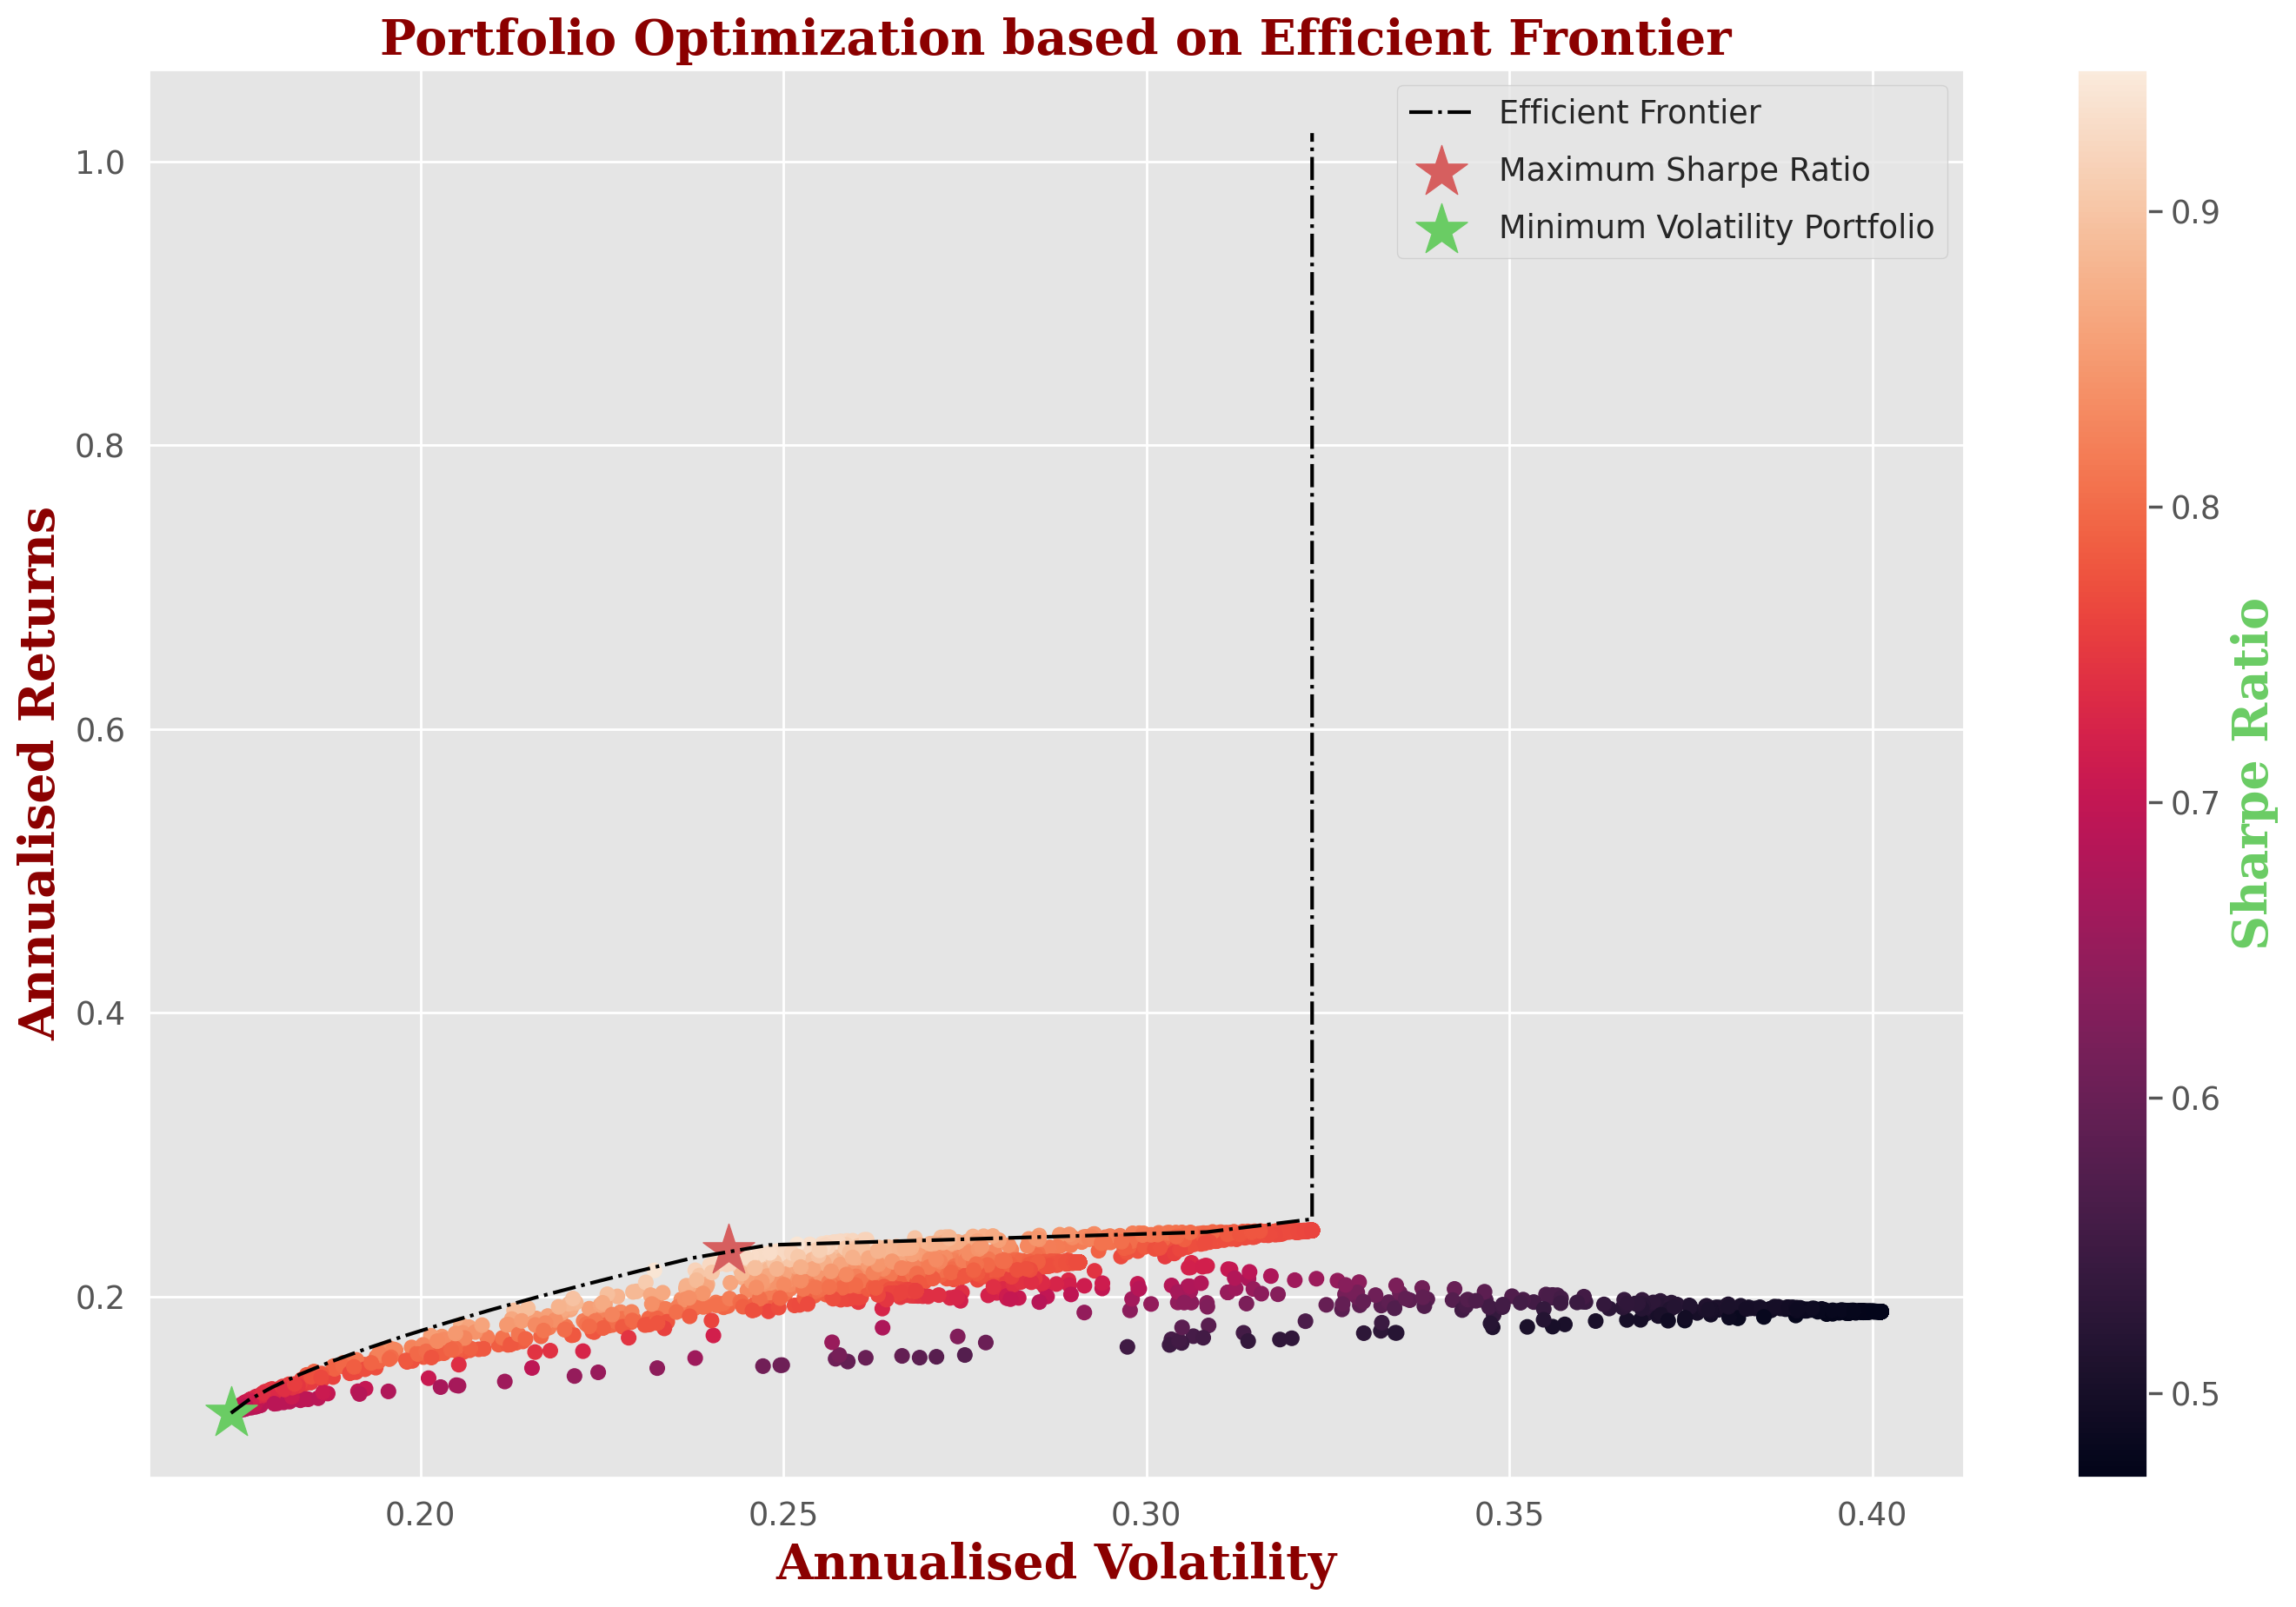

In [161]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

In [162]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [163]:
tickers = []
for i in dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].columns:
    tickers.append(i)

In [164]:
mean_returns = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().mean()
cov = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) #random selection/creation of the portfolio

In [165]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

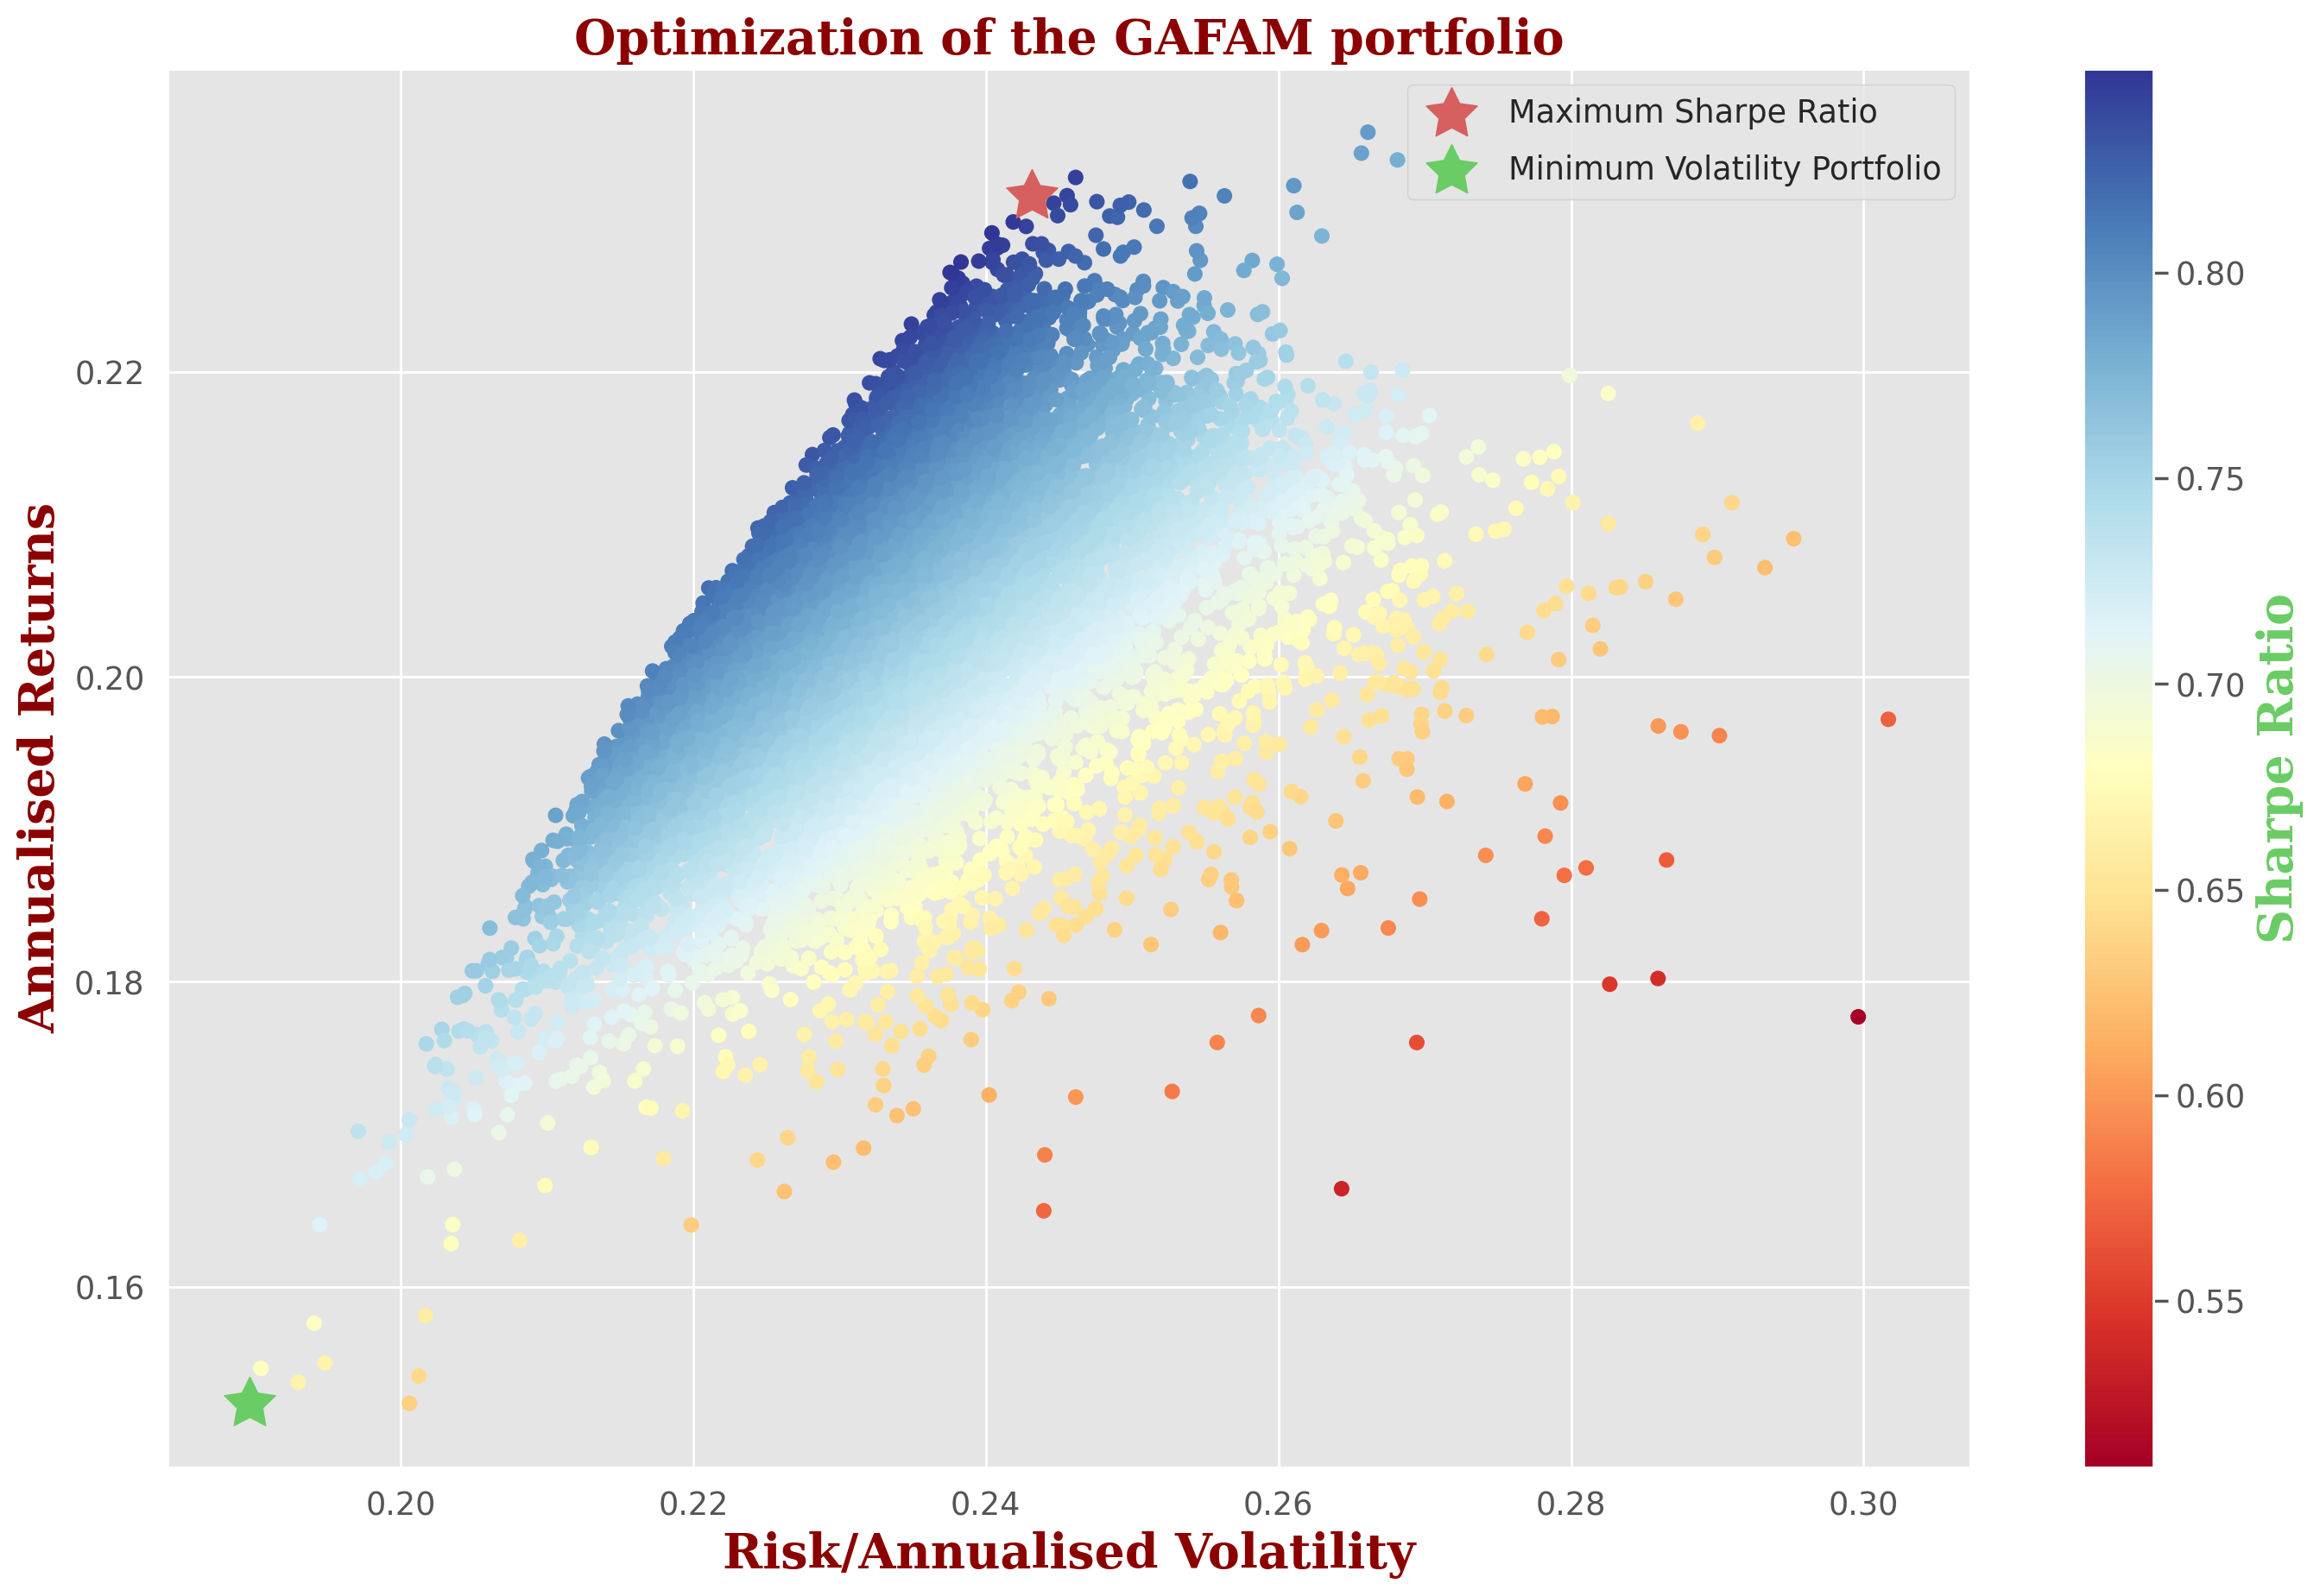

In [166]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the GAFAM portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

In [167]:
max_sharpe_port.to_frame().T # portfolio with the highest Sharpe ratio. it is negative when the investment return is Lower than

ret    stdev    sharpe      GOOG      AAPL      META      AMZN  \
3270  0.231556  0.24312  0.849603  0.011955  0.269486  0.034679  0.209609   

          MSFT      GSPC  
3270  0.469536  0.004734

In [168]:
min_vol_port.to_frame().T #portfolio with the Lowest variance portfolio

ret     stdev   sharpe      GOOG     AAPL      META      AMZN  \
2695  0.152335  0.189673  0.67134  0.129409  0.07794  0.052775  0.016958   

          MSFT      GSPC  
2695  0.079501  0.643417